<span style="font-size:28pt; font-weight: bold;">Factor Analysis: Vehicle Selling Price</span>

<span id="contents" style="font-size:20pt; font-weight: bold;">Table of Contents</span>

1. [Introduction](#Introduction)
   

2. [Data Preparation](#Data-Preparation)
   - [Loading Data](#Loading-Data)
   - [Initial Data Exploration](#Initial-Data-Exploration)
   - [Preliminary Conclusion](#Preliminary-Conclusion)
    

3. [Data-Transformation](#Data-Transformation)
   - [Missing Values](#Missing-Values)
   
       - [4wd Column](#4wd-Column)
       - [paint color Column](#paint-color-Column)
       - [odometer Column](#odometer-Column)	
       - [cylinders Column](#cylinders-Column)
       - [model year Column](#model-year-Column)
       
   - [Data Type](#Data-Type)


4. [Feature-Engineering](#Feature-Engineering)
   - [Date and Time of Advertisement](#Date-and-Time-of-Advertisement)
   - [Vehicle Age](#Vehicle-Age)
   - [Average Milage per Year](#Average-Milage-per-Year)
   - [Condition Categorization](#Condition-Categorization)


5. [Explorative Data Analysis](#Explorative-Data-Analysis)
   - [Filtered Data Overview](#Filtered-Data-Overview)
   - [Outliers in Core Parameters](#Outliers-in-Core-Parameters)
   - [Addressing Outliers](#Addressing-Outliers)
   - [Filtered Core Parameters](#Filtered-Core-Parameters)
       - [Price](#Price)
       - [Vehicle Age](#Vehicle-Age)
       - [Cylinders](#Cylinders)
       - [Average Mileage per Year](#Average-Mileage-per-Year)
       - [Condition](#Condition)
   - [Advertisement Duration](#Advertisement-Duration)
   - [Average Selling Price by Type](#Average-Selling-Price-by-Type)
   - [Price Factor](#Price-Factor)
       - [Sedan](#Sedan)
       - [SUV](#SUV)
       
       
6. [Findings and Conclusion](#Findings-and-Conclusion)

# Introduction

Vehicle sales are closely tied to marketing activities. Hundreds of free vehicle advertisements are posted on the company’s website daily. There is a growing need to analyze the data collected over recent years in order to identify the factors that influence vehicle pricing, particularly for cars.

Price is one of the four key elements of the marketing mix, making pricing decisions an area that requires continuous evaluation. Often, marketers and business practitioners hope to identify a single, explicit factor that determines market value. However, in practice, it is rarely the case that price is directly influenced by a single factor. More commonly, several interconnected factors affect pricing, although their direct influence on the final price may not be immediately apparent.

Several factors are believed to influence the market value of a car, including price, vehicle age at the time of advertisement, mileage, engine cylinder count, and overall condition. The aim of this project is to investigate these factors in greater depth.

This report is structured into five sections: inisialization, data preparation, data transformation and feature engineering, exploratory data analysis, and conclusions.

[Back to Contents](#contents)

# Data Preparation

In this section, the data will be prepared for subsequent processing stages. The steps involved include addressing missing values and correcting inappropriate data types.

In [1]:
# import libraries
import pandas as pd
from scipy.stats import f_oneway
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# load dataset
df = pd.read_csv('/datasets/vehicles_us.csv')

In [3]:
df.shape #display shape of dataset

(51525, 13)

The dataset consists of 13 columns and 51.525 rows.

## Initial Data Exploration

Columns in the dataset provide for information as follow:

- `price`- selling price of the vehicle
- `model_year`- release year of vehicle
- `model` - brand and model of the vehicle
- `condition` - condition of the vehicle
- `cylinders` - number of cylinder
- `fuel` — type of fuel (gas, disel, et cetera)
- `odometer` — vehicle mileage at the time of advertisement
- `transmission` - type of transmission
- `paint_color`- color of vehicle
- `is_4wd` — Boolean data of whether or not vehicle is a 4-wheel-drive
- `date_posted` — date of advertisement
- `days_listed` — duration of advertisement (in days)

In [4]:
# general info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
#display sample
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
35808,12799,2012.0,honda pilot,excellent,6.0,gas,NaN,automatic,SUV,black,NaN,2018-08-09,23
23087,3800,2006.0,ford fusion,like new,4.0,gas,155000.0,automatic,sedan,blue,1.0,2018-10-16,66
13010,4500,2008.0,subaru forester,good,4.0,gas,167800.0,automatic,wagon,black,1.0,2018-09-12,41
47086,3992,2006.0,honda accord,excellent,4.0,gas,179845.0,automatic,sedan,silver,NaN,2018-08-12,45
382,5495,2009.0,honda accord,good,4.0,gas,118791.0,automatic,sedan,black,NaN,2018-11-09,114
47105,22990,2011.0,jeep wrangler unlimited,like new,6.0,gas,74795.0,automatic,SUV,orange,1.0,2018-09-29,45
37254,1500,NaN,ford mustang,fair,NaN,gas,NaN,automatic,coupe,red,NaN,2018-08-21,62
34657,13995,2006.0,jeep wrangler,like new,6.0,gas,189060.0,manual,SUV,green,1.0,2018-05-11,56
39622,5498,2014.0,ford escape,excellent,4.0,gas,171000.0,automatic,SUV,NaN,NaN,2019-02-13,107
18265,27500,2018.0,jeep wrangler,like new,6.0,gas,17224.0,automatic,SUV,black,1.0,2018-08-27,24


The general info of DataFrame exhibits discprepancies between non-null values in some columns and the total entry, indicating mising values in the dataset. Some values in the displayed sample of data also indicate that they are not the correct data type.

In [6]:
#check data type of each column
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Columns with incorrect data type are as follow:    

`model_year` - expected to have integer data  

`cylinder` - expected to have integer data      

`date_posted` - expected to have datetime data 

In [7]:
#check missing values
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending=False)

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


There are five columns with missing values, some of which are factors influencing the hypothesis
(`cylinders`, `odometer`, `model_year`); therefore, this issue cannot be overlooked.

Additionally, one column of particular interest is `is_4wd`, as it has approximately half of its entries missing.

## Preliminary Conclusion

Based on the overview of the data, columns `price`, `condition`, and `date_posted` are the factors that will be tested for their relationship with the hypothesis, and none of these columns contain missing values.

Columns `odometer` and `cylinder` are also factors that will be tested for their relationship with the hypothesis, with missing values of 15% and 10%, respectively. Since these columns contain **numerical values**, the missing entries will be replaced with either the mean or the median. The choice of which value to use will depend on the distribution of data in each column and will be detailed in the subsequent sections of this report.

Although the columns `is_4wd` and `paint_color` rank among the top two for the highest percentage of missing values, they contain **categorical values**. Additionally, the features of four-wheel drive and car color are *not* factors that will be tested for their relationship with the hypothesis. For the time being, the missing values in these columns can be replaced with representative categorical values. Should further analysis reveals that these columns significantly impact the data, alternative methods for handling the missing values will be employed.

While the column `model_year` is not directly tested for its relationship with the hypothesis, it contains data necessary for determining another factor, namely: age of vehicle at the time of sale (the difference between the model year and the year of sale). Therefore, handling the missing values in this column will be similar to that of the `odometer` and `cylinder` columns, using the mean or median as representative substitutes, depending on the distribution of the data.

[Back to Contents](#contents)

# Data Transformation

## Missing Values

### `is_4wd` Column

In [8]:
#display unique values in 'is_4wd'
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [9]:
#check missing values in 'is_4wd'
df['is_4wd'].isnull()

0        False
1        False
2         True
3         True
4         True
         ...  
51520     True
51521     True
51522     True
51523     True
51524     True
Name: is_4wd, Length: 51525, dtype: bool

There is only one unique value in the column `is_4wd`. This column is intended to contain Boolean values, where 1.0 represents True, and all missing values are effectively interpreted as False. This situation may arise from the questionnaire format used during data collection, which only allowed for a single type of response (e.g., *"check the box if the vehicle is a four-wheel drive"*). Consequently, if a respondent's situation did not align with the questionnaire description, the response was not provided, resulting in the system interpreting it as a missing value.

To address the missing values in this column, the representative value used will be **0 (zero)**, serving as the counterpart to 1.

In [10]:
#replace missing values with 0
df['is_4wd'] = df['is_4wd'].fillna(0)

In [11]:
#check missing values after replacement 
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

The percentage of missing values in the `is_4wd` column is now 0%, indicating that there are no longer any missing values.

### `paint_color` Column

The presence of missing values in the `paint_color` column is likely due to the questionnaire format that allowed respondents to leave the field blank. However, addressing the missing values in this column requires little consideration, as color is not a factor being tested for its relationship with vehicle pricing. The necessary step is to replace the missing values with the string **'unknown'** making the data easier to interpret.

In [12]:
#replace missing values with string 'unknown'
df['paint_color'] = df['paint_color'].fillna('other')

In [13]:
#check missing values after replacement
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

The percentage of missing values in the `paint_color` column is now 0%, indicating that there are no longer any missing values.

### `odometer` Column

The `odometer` column contains numerical values and is also a factor intended for testing its relationship with price. Before determining a representative value to replace the missing entries, it is essential to first examine the distribution of these values within the dataset.

In [14]:
#check data distribution of column 'odometer'
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [15]:
#check interquartile range (iqr)
q1 = df['odometer'].quantile(.25)
q3 = df['odometer'].quantile(.75)
iqr = q3 - q1
iqr

85000.0

From the information regarding the distribution of data in the `odometer` column, three key findings emerge:

- The difference between the mean (115,553) and the median (113,000) is not significant.

- The interquartile range is 85,000, which captures the majority of the values quite substantially.

- The standard deviation (65,094), while not small, is also not excessively large.

Based on these three findings, it can be concluded that the data in the `odometer` column exhibits a **normal distribution**. Therefore, the representative value used to replace the missing entries will be the **mean**.

In [16]:
#function to condition fillna
def fill_missing_value_mean(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].mean().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [17]:
#apply function
#assign 'condition' to 'agg_column' (as a column without missing value)
#assign 'odometer' to 'value_column'
fill_missing_value_mean(df, 'condition', 'odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71


In [18]:
#check missing values in 'odometer'
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
type             0.000000
paint_color      0.000000
is_4wd           0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

The percentage of missing values in the `odometer` column is now 0%, indicating that there are no longer any missing values.

### `cylinders` Column

The `cylinders` column contains numerical values and is also a factor intended for testing its relationship with price. Before determining a representative value to replace the missing entries, it is essential to first examine the distribution of these values within the dataset.

In [19]:
#check data disctribution in column 'cylinders'
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [20]:
#check interquartile range (iqr)
q1 = df['cylinders'].quantile(.25)
q3 = df['cylinders'].quantile(.75)
iqr = q3 - q1
iqr

4.0

From the information regarding the distribution of data in the cylinders column, three key findings emerge:

- The difference between the mean (6.125) and the median (6) is not significant.

- The interquartile range is 4, indicating that it does not capture the full spread of values (which range from 3 to 12) substantially.

- The standard deviation (1.6), while appearing small, indicates a variation that is relatively far from the mean.

Based on these three findings, it can be concluded that the data in the cylinders column **does not exhibit characteristics of a normal distribution**. Therefore, the representative value used to replace the missing entries will be the **median**.

In [21]:
#function that conditions fillna to replace with median value
def fill_missing_value_median(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [22]:
#apply function
#assign 'condition' to 'agg_column' (as column with no missing value)
#assign 'cylinders' to 'value_column'
fill_missing_value_median(df, 'condition', 'cylinders')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71


In [23]:
#check missing values after replacement
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

model_year      7.023775
price           0.000000
model           0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.000000
transmission    0.000000
type            0.000000
paint_color     0.000000
is_4wd          0.000000
date_posted     0.000000
days_listed     0.000000
dtype: float64

The percentage of missing values in the `cylinders` column is now 0%, indicating that there are no longer any missing values.

### `mode_year` Column

The `model_year` column contains numerical values and is also a factor intended for testing its relationship with price. Before determining a representative value to replace the missing entries, it is essential to first examine the distribution of these values within the dataset.

In [24]:
#check data distribution in column 'model_year'
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [25]:
#check interquartile rage (iqr)
q1 = df['model_year'].quantile(.25)
q3 = df['model_year'].quantile(.75)
iqr = q3 - q1
iqr

8.0

From the information regarding the distribution of data in the `model_year` column, three key findings emerge:

- The difference between the mean (2009) and the median (2011), while not small, is not significantly large either.

- The interquartile range is 8 (from 2014 to 2006), which does not substantially encompass the full range of values (from 2019 to 1908, totaling 111).

- The standard deviation (6.28) indicates a variation that is relatively far from the mean.

Based on these three findings, it can be concluded that the data in the `model_year` column exhibits characteristics of a **skewed distribution**. Therefore, the representative value used to replace the missing entries will be the **median**.

In [26]:
#apply function
#assign 'condition' to 'agg_column' (as a column without missing value)
#assign 'model_year' to 'value_column'
fill_missing_value_median(df, 'condition', 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,183062.233577,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71


In [27]:
# check missing value after replacement
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending=False)

,missing_values,% of total
price,0,0.0
model_year,0,0.0
model,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0
type,0,0.0
paint_color,0,0.0


Table above exhibits that there are no more missing value in the dataset.

## Data Type

After addressing the missing values, the next step is to change the data types of the columns that appear to be incorrectly formatted. The columns in question are as follows:

- `date_posted` should be of **datetime** type,
- `cylinders` should be of **integer** type,
- `price` should be of **float** type,
- `model_year` should be of **integer** type,
- `is_4wd` should be of **Boolean** type.

In [28]:
#change 'date_posted' to datetime
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [29]:
#change 'model_year' to integer
df['model_year'] = df['model_year'].astype('int')
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [30]:
#change 'cylinders' to integer
df['cylinders'] = df['cylinders'].astype('int')
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

**Changing data type of `odometer` column**

Mileage is a variable that may contain fractional values (e.g., 523.41 kilometers), thus the appropriate data type should be **float**.

In [31]:
#change 'odometer' to float
df['odometer'] = df['odometer'].astype('float')
df.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

**Changing data type of `price` column**  

Price is a variable that may contain fractional values, thus the appropriate data type should be **float**.

In [32]:
#change 'price' to float
df['price'] = df['price'].astype('float')
df.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

**Changing data type of `is_4wd` column**

The `is_4wd` column contains True/False values, where a value of 1 indicates that the vehicle is a four-wheel drive; therefore, the appropriate data type should be Boolean.

In [33]:
#Change 'is_4wd' to boolean
df['is_4wd'] = df['is_4wd'].astype('bool')
df.dtypes

price                  float64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

The data type of column `is_4wd` has been successfully changed to Boolean.

[Back to Contents](#contents)

# Feature Engineering

After addressing the missing values and changing the data types, the data is now ready for analysis to fulfill the objectives of this report. However, several actions can be taken to facilitate the analysis, such as extracting existing data to create additional features within the dataframe.

Some of these actions include:

- Adding the timestamp of the advertisement postings,
- Incorporating the age of the vehicle at the time the advertisement was posted,
- Calculating the average mileage per year for the vehicles,
- Replacing the values in the 'condition' column with ordinal values to enable analysis alongside other numeric data.

## Date and Time of Advertisement

In [34]:
# Add new column containing date, month and year of advertisement
df['day_posted'] = df['date_posted'].dt.day
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,23,6,2018
1,25500.0,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019
3,1500.0,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,other,False,2019-03-22,9,22,3,2019
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019


Three new columns have been added to the dataframe, containing information about the date, month, and year in which the vehicle was advertised.

## Vehicle Age

In [35]:
# add new column containing age (in years) of vehicle at the time of advertisement (year_posted - model_year)
df['car_age'] = (df['year_posted'] - df['model_year']).astype(int) + 1
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age
9045,5500.0,2009,honda odyssey,excellent,6,gas,130000.0,automatic,mini-van,silver,False,2018-05-04,14,4,5,2018,10
34963,39263.0,2015,chevrolet silverado 2500hd,excellent,8,diesel,76523.0,automatic,truck,white,True,2018-09-09,23,9,9,2018,4
439,1000.0,2008,ford f150,salvage,8,gas,285000.0,automatic,pickup,white,False,2018-10-19,19,19,10,2018,11
37835,17499.0,2010,jeep wrangler,excellent,6,gas,72000.0,automatic,SUV,red,True,2018-11-29,25,29,11,2018,9
9156,2200.0,2000,ford taurus,good,4,gas,72783.0,automatic,sedan,custom,True,2018-12-10,10,10,12,2018,19
3684,16000.0,2013,gmc sierra 1500,excellent,8,gas,161000.0,automatic,truck,white,True,2018-09-30,51,30,9,2018,6
22933,11999.0,2006,jeep wrangler,excellent,6,gas,41000.0,automatic,SUV,green,True,2018-12-21,37,21,12,2018,13
23489,4000.0,2011,volkswagen jetta,excellent,4,gas,122000.0,automatic,sedan,white,False,2018-10-16,21,16,10,2018,8
32829,16999.0,2012,ford f150,excellent,8,gas,129611.0,automatic,pickup,blue,True,2019-03-20,14,20,3,2019,8
32454,31400.0,2016,chevrolet silverado 1500 crew,good,8,gas,15070.0,automatic,pickup,black,True,2019-01-31,12,31,1,2019,4


A new column containing age of vehicle (in years) at the time of advertisement has been successfully added to the DataFrame.

## Average Mileage per Year

In [36]:
# adding column 'avg_odometer_per_year' 
df['avg_odometer_per_year'] = df['odometer'] / df['car_age']
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
0,9400.0,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2009,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10,8870.500000
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,fair,8,gas,183062.233577,automatic,pickup,other,False,2019-03-22,9,22,3,2019,17,10768.366681
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


In [37]:
# check data distribution in column 'avg_odometer_per_year'
df.describe()

,price,model_year,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.112450,115545.006089,39.55476,15.449491,6.628491,2018.307462,9.491043,15461.145839
std,10040.803015,6.091605,1.573784,60397.752196,28.20427,8.736521,3.474134,0.461447,6.105618,11946.881982
min,1.000000,1908.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79009.000000,19.00000,8.000000,3.000000,2018.000000,5.000000,9420.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,8.000000,13201.666667
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,13.000000,18216.100000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,111.000000,373200.000000


## Condition Categorization

The dataset currently displays ordinal value to indicate vehicle condition (0 to 5). For legibility reason, the ordinal value will be changed to string that will better describe the condition of vehicle. 

In [38]:
# function to replace ordinal value with string
def get_condition(cell):
    if cell == 'new':
        return 5
    elif cell == 'like new':
        return 4
    elif cell == 'excellent':
        return 3
    elif cell == 'good':
        return 2
    elif cell == 'fair':
        return 1
    else:
        return 0


In [39]:
# apply function to 'condition' column
df['condition'] = df['condition'].apply(get_condition)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2009,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10,8870.500000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,183062.233577,automatic,pickup,other,False,2019-03-22,9,22,3,2019,17,10768.366681
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
5,14990.0,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,True,2018-06-20,15,20,6,2018,5,11590.800000
6,12990.0,2015,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,False,2018-12-27,73,27,12,2018,4,19803.000000
7,15990.0,2013,honda pilot,3,6,gas,109473.000000,automatic,SUV,black,True,2019-01-07,68,7,1,2019,7,15639.000000
8,11500.0,2012,kia sorento,3,4,gas,104174.000000,automatic,SUV,other,True,2018-07-16,19,16,7,2018,7,14882.000000
9,9200.0,2008,honda pilot,3,6,gas,147191.000000,automatic,SUV,blue,True,2019-02-15,17,15,2,2019,12,12265.916667


[Back to Contents](#contents)

# Explorative Data Analysis

## Filtered Data Overview

In [40]:
# general info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   price                  51525 non-null  float64       
 1   model_year             51525 non-null  int64         
 2   model                  51525 non-null  object        
 3   condition              51525 non-null  int64         
 4   cylinders              51525 non-null  int64         
 5   fuel                   51525 non-null  object        
 6   odometer               51525 non-null  float64       
 7   transmission           51525 non-null  object        
 8   type                   51525 non-null  object        
 9   paint_color            51525 non-null  object        
 10  is_4wd                 51525 non-null  bool          
 11  date_posted            51525 non-null  datetime64[ns]
 12  days_listed            51525 non-null  int64         
 13  d

In [41]:
# display data sample
df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
18153,17800.0,2016,chevrolet silverado,3,8,gas,71000.000000,automatic,pickup,blue,True,2019-01-07,38,7,1,2019,4,17750.000000
11578,4250.0,2012,chevrolet cruze,3,4,gas,147.000000,manual,sedan,red,False,2018-06-24,16,24,6,2018,7,21.000000
47530,2500.0,2002,ford mustang,2,6,gas,125000.000000,automatic,coupe,white,False,2019-01-07,8,7,1,2019,18,6944.444444
8692,11997.0,2016,honda civic lx,4,4,gas,79426.738166,automatic,sedan,black,False,2018-10-29,63,29,10,2018,3,26475.579389
8426,16950.0,2008,chevrolet silverado 2500hd,3,8,diesel,207597.000000,automatic,truck,red,False,2018-05-27,6,27,5,2018,11,18872.454545
16352,9995.0,2000,jeep cherokee,3,6,gas,61951.000000,automatic,SUV,other,False,2018-05-03,25,3,5,2018,19,3260.578947
40772,3400.0,2005,ford fusion se,3,4,gas,176000.000000,automatic,sedan,other,False,2018-12-06,13,6,12,2018,14,12571.428571
22780,12750.0,2018,nissan frontier,3,6,gas,16273.000000,automatic,pickup,red,True,2018-06-21,21,21,6,2018,1,16273.000000
29914,2700.0,2004,ford explorer,2,8,gas,141000.000000,automatic,SUV,red,True,2019-01-04,21,4,1,2019,16,8812.500000
22390,5450.0,2009,ford edge,2,6,gas,231894.000000,automatic,SUV,black,True,2019-02-19,106,19,2,2019,11,21081.272727


In the filtered dataframe, there are no longer any missing values. All columns have the appropriate data types. Additionally, the number of columns has increased by five, incorporating the extracted data necessary to facilitate the analysis.

## Outliers in Core Parameters

There are five core parameters to consider:

- Price
- Age of the vehicle at the time the advertisement was posted
- Average mileage of the vehicle per year
- Number of cylinders
- Condition

It is essential to examine these core parameters for the presence of outliers. This analysis will inform the investigation of how outliers affect the overall data and guide the appropriate handling of outliers for each parameter in subsequent stages.

To determine the necessary data visualizations for illustrating the core parameters, each examination will begin with an analysis of the data distribution.

In [42]:
# distribution of 'price'
df['price'].describe()


count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

The information above indicates a skewed distribution. The mean and median are significantly different, and the standard deviation is high. Additionally, the interquartile range does not encompass the overall range of the data substantially. The minimum value in this distribution is particularly noteworthy due to its extreme low value.

In addition to the histogram, a **boxplot** is also necessary to further examine the typical values and outliers in this dataset.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

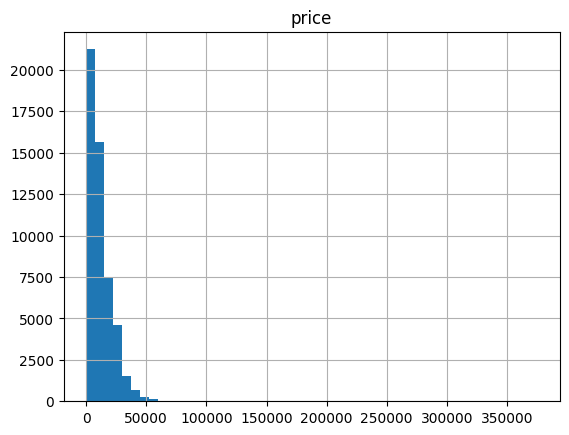

In [43]:
# histogram for price parameter
df.hist('price', bins=50)

Many rows in the dataset have prices close to zero, which is illogical. To investigate further, we will narrow the histogram range to 1 - 5,000 (the minimum value to the upper limit of the first quartile).

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

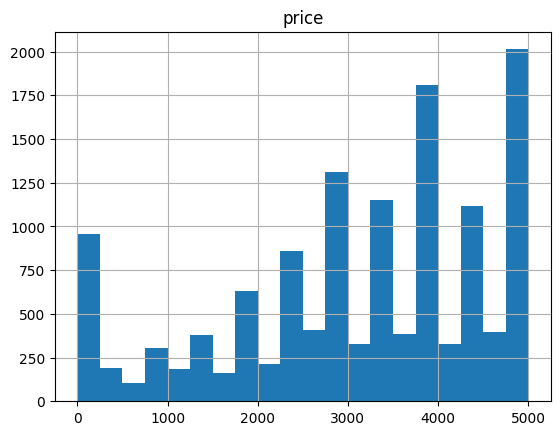

In [44]:
df.hist('price', bins=20, range=(1, 5000))

According to this histogram, over 900 vehicles are sold within the price range of 0 to 200. Even considering the data distribution, the minimum recorded value is 1. Such a price is not reasonable for a vehicle, regardless of its condition.

Since price is a key variable in this analysis, this anomaly should be noted during the data filtering stage, particularly when determining the **lower threshold** for outliers.

<AxesSubplot:xlabel='price'>

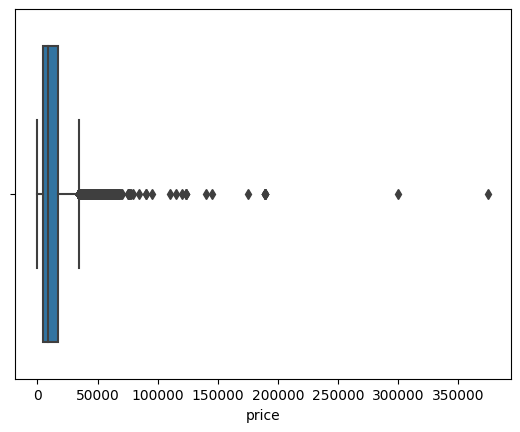

In [45]:
# boxplot for price parameter
sns.boxplot(df['price'])

A significant number of values lie beyond the upper whisker, which can be identified as outliers.

In [46]:
# check data distribution for column 'car_age'
df['car_age'].describe()

count    51525.000000
mean         9.491043
std          6.105618
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max        111.000000
Name: car_age, dtype: float64

Based on the information above, the mean and median are relatively close to each other. The standard deviation (6.1) is relatively high. The interquartile range (8) is not far from the median, indicating that it encompasses the data substantially. This suggests characteristics of a normal distribution. However, the presence of an extreme maximum value (111) is noteworthy.

In addition to the histogram, a more informative visualization, such as a **boxplot**, is needed to further analyze typical values and outliers.

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

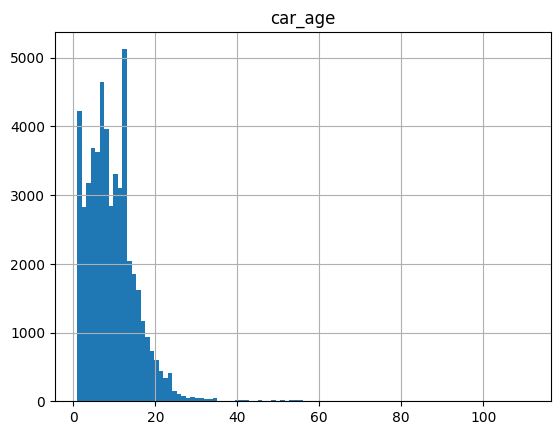

In [47]:
# histogram for car age parameter
df.hist('car_age', bins=100)

In addition to the presence of extremely large values, the highest frequency is observed in the range of less than 10 years.

<AxesSubplot:xlabel='car_age'>

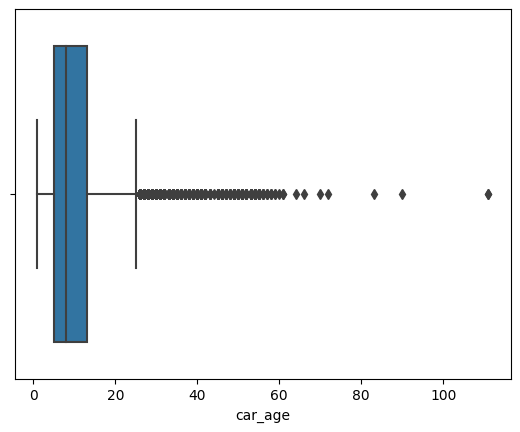

In [48]:
# boxplot for car age
sns.boxplot(df['car_age'])

A significant number of values lie beyond the upper whisker, which can be identified as outliers. Given that the average age is 9 and the median is 8, it is reasonable for values above 20 to fall outside the upper whisker.

In [49]:
# data distribution of 'avg_odometer_per_year' column
df['avg_odometer_per_year'].describe()

count     51525.000000
mean      15461.145839
std       11946.881982
min           0.000000
25%        9420.000000
50%       13201.666667
75%       18216.100000
max      373200.000000
Name: avg_odometer_per_year, dtype: float64

Based on the information above, the difference between the mean and median is relatively small. While the standard deviation is not low, it is also not excessively large. The interquartile range (68,812) is not far from the median. This suggests characteristics of a normal distribution, despite the presence of a relatively extreme low minimum value.

array([[<AxesSubplot:title={'center':'avg_odometer_per_year'}>]],
      dtype=object)

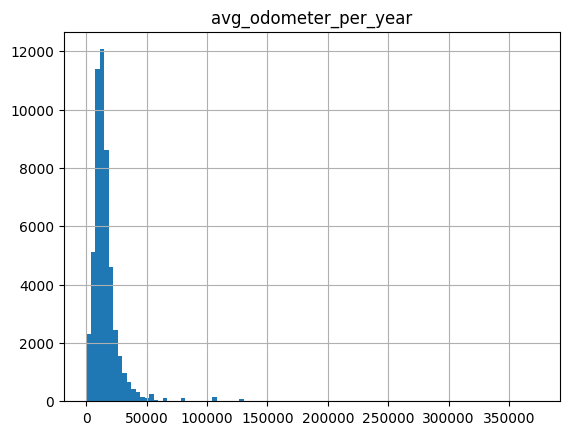

In [50]:
# histogram for average mileage per year
df.hist('avg_odometer_per_year', bins=100)

Histrogam exhibits skewed distribution.

<AxesSubplot:xlabel='avg_odometer_per_year'>

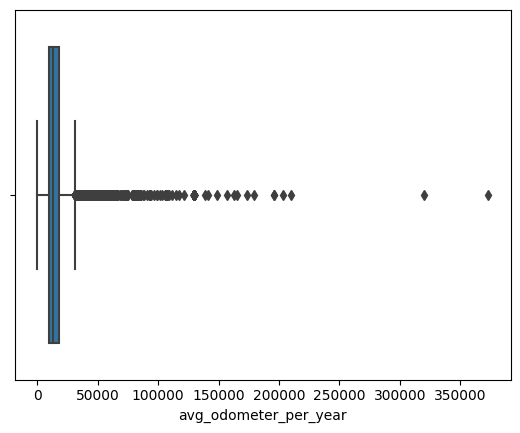

In [51]:
# boxplot for average mileage per year
sns.boxplot(df['avg_odometer_per_year'])

Consistent with the assumptions made from observing the histogram, the boxplot indeed reveals a considerable number of outliers.

Based on the distribution of average mileage per year, the difference between the mean and median is relatively large. The standard deviation is moderate—neither small nor excessively large. The interquartile range (11,238) substantially covers the central portion of the second quartile. This suggests a mix of characteristics from both normal and skewed distributions.

In [52]:
# distribution of 'cylinders' column
df['cylinders'].describe()

count    51525.000000
mean         6.112450
std          1.573784
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Based on the information above, the mean and median are fairly close. The standard deviation is relatively small. The interquartile range of 4 is not far from the median, indicating that it encompasses the data substantially. This suggests characteristics of a normal distribution. At first glance, there appear to be no extreme minimum or maximum values.

While a histogram is an appropriate visualization for this data, a boxplot will also be displayed to confirm the presence of any outliers.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

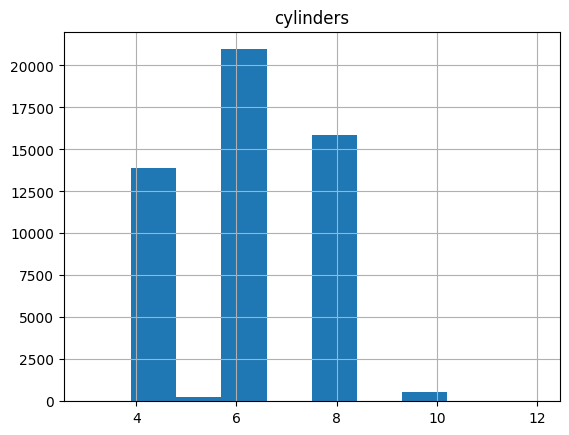

In [53]:
# histogram for cylinders
df.hist('cylinders', bins=10)

At first glance, the histogram does not reveal any extreme values that would affect the shape of the data distribution.

<AxesSubplot:xlabel='cylinders'>

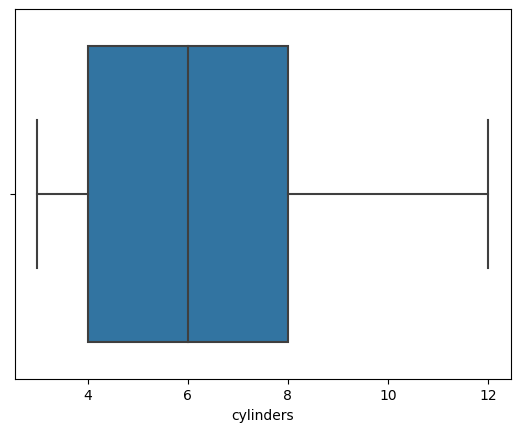

In [54]:
# boxplot for cylinders
sns.boxplot(df['cylinders'])

As anticipated, there are no values beyond the lower whisker or upper whisker, indicating that there are no outliers for the parameter of the number of cylinder.

In [55]:
# distribution of 'condition_category'
df['condition'].describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Based on the information above, the mean and median are quite close to each other. The standard deviation is very small. The interquartile range is 1 (from 2 to 3), indicating that it substantially encompasses the data. This suggests characteristics of a normal distribution. At first glance, there appear to be no extreme minimum or maximum values.

The appropriate data visualization for this analysis is a histogram.

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

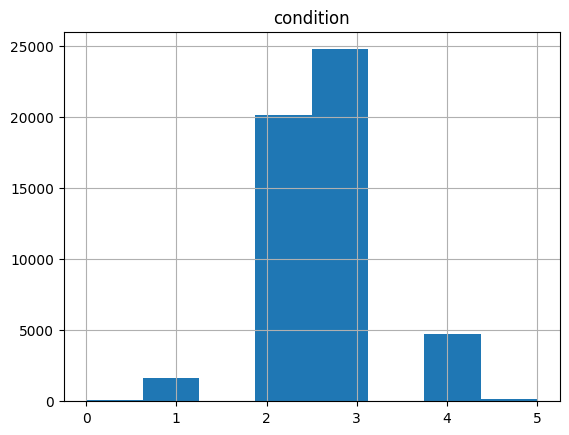

In [56]:
# histogram of 'condition_category'
df.hist('condition', bins=8)

Histogram exhibit characteristics of normal distribution with no indication  of outliers. 

## Addressing Outliers

After examining the distribution of key parameters and their visualizations, the following parameters exhibit outlier values:

- Price (column `price`)
- Vehicle age (column `car_age`)
- Number of cylinders (column `cylinders`)
- Average mileage (column `avg_odometer_per_year`)
- Vehicle condition at the time of advertisement (column `condition`)

Outlier values will be addressed using the interquartile range as the basis for determining the upper and lower thresholds. Values outside these bounds will be removed, and the filtered data will be compiled and processed into a new dataframe called **filtered_df**.

In [57]:
# function to determine upper and lower whiskers
def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    return lower_whisker, upper_whisker

In [58]:
# function to eliminate outliers in column and repeat if outliers remain 
def outlier_cleansing(dataframe, column):

    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe

    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe=dataframe, column=column)
        return dataframe


====== [START] cleaning outlier in condition column ====== 

lower values : 0.5
upper values : 4.5


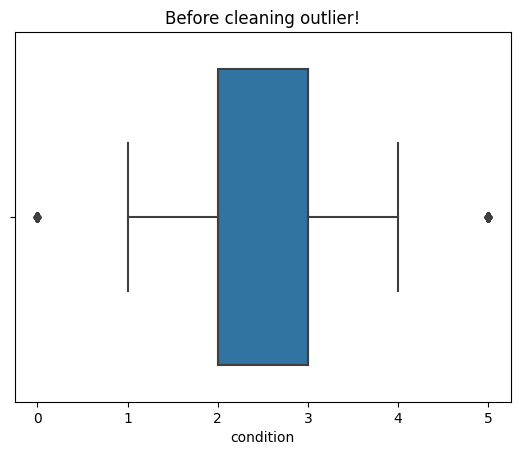

lower_check values : 0.5
upper_check values : 4.5


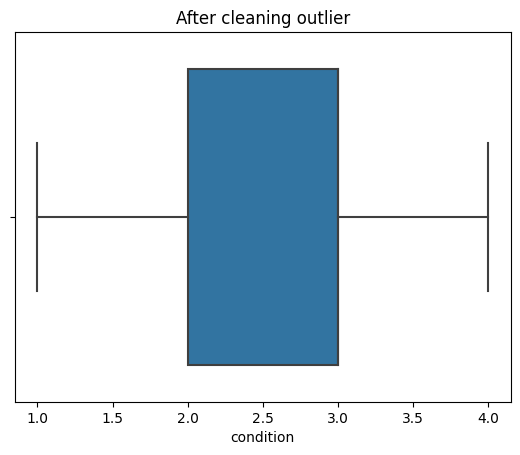


====== [FINISHED] outlier in [condition] column has been clear! ====== 


====== [START] cleaning outlier in price column ====== 

lower values : -12700.0
upper values : 34500.0


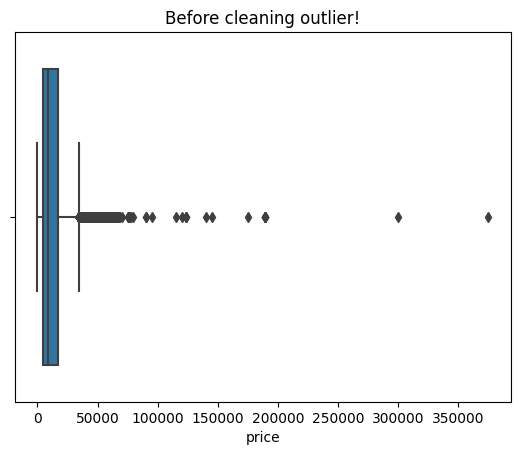

lower_check values : -11362.5
upper_check values : 32257.5


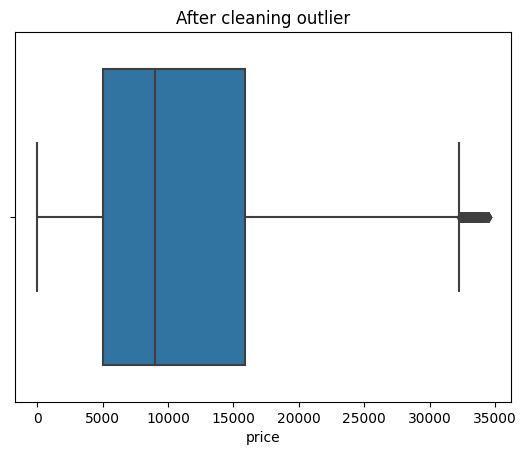


------ [RE-START] cleaning outlier in price column ------ 

lower values : -11362.5
upper values : 32257.5


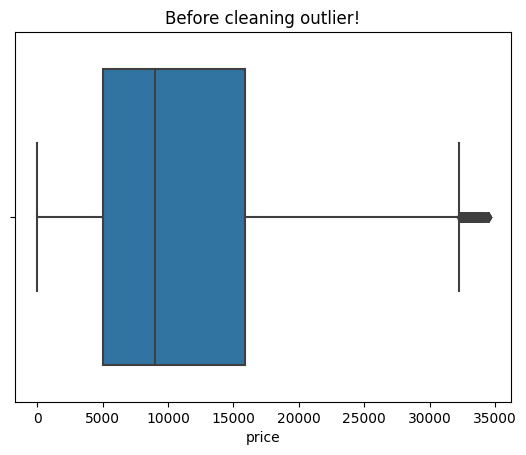

lower_check values : -10762.5
upper_check values : 31257.5


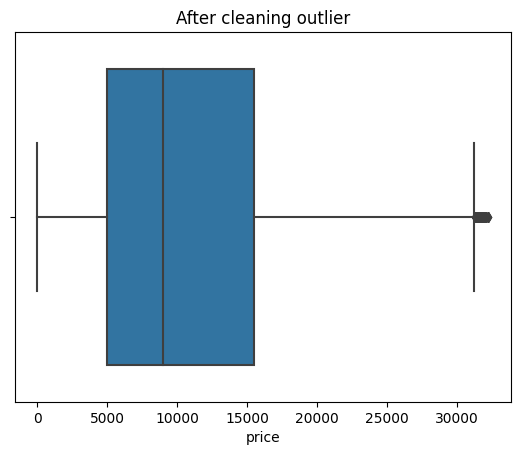


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10762.5
upper values : 31257.5


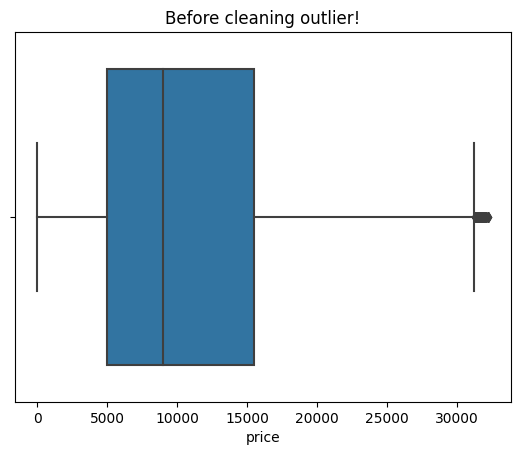

lower_check values : -10012.5
upper_check values : 30007.5


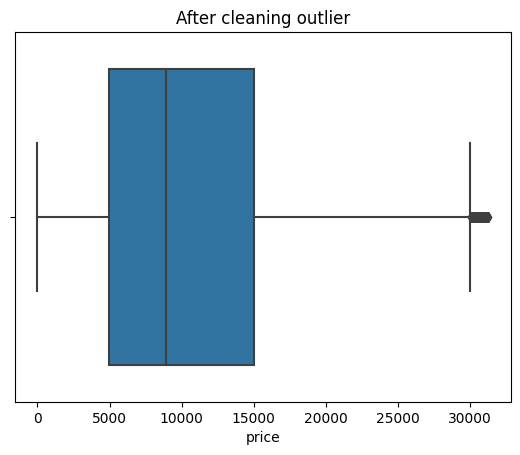


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10012.5
upper values : 30007.5


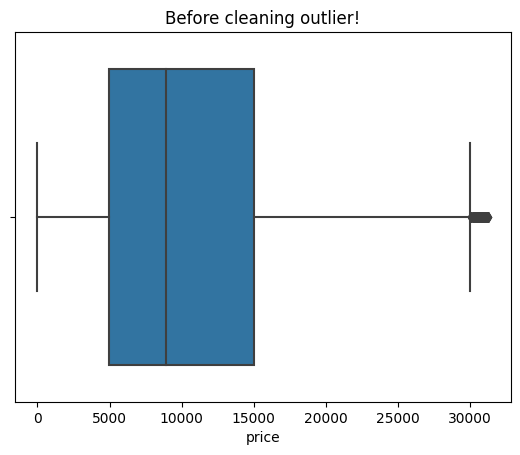

lower_check values : -10011.0
upper_check values : 30005.0


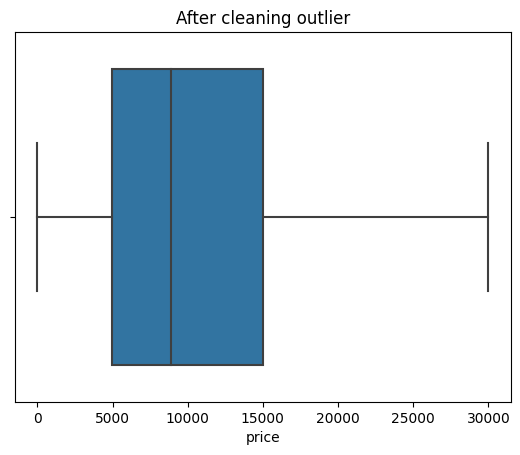


------ [RE-START] cleaning outlier in price column ------ 

lower values : -10011.0
upper values : 30005.0


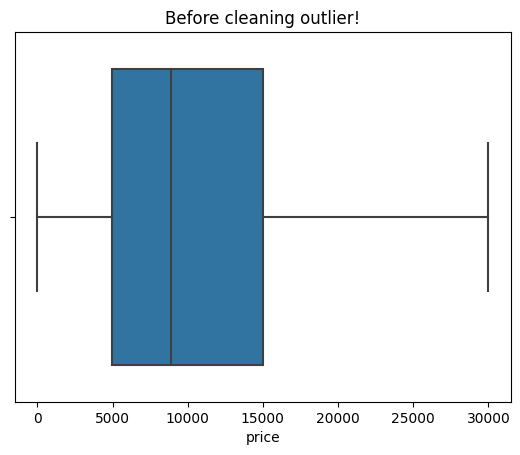

lower_check values : -10011.0
upper_check values : 30005.0


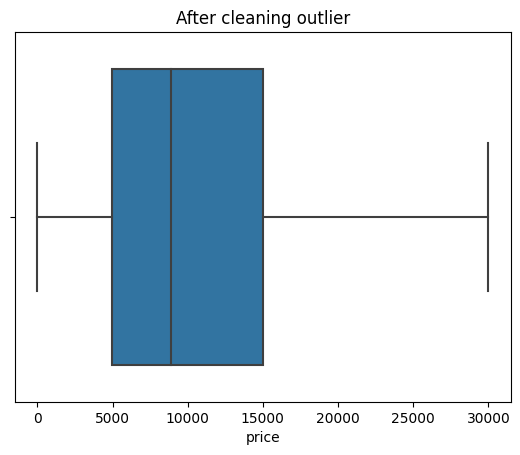


====== [FINISHED] outlier in [price] column has been clear! ====== 


====== [START] cleaning outlier in avg_odometer_per_year column ====== 

lower values : -3309.170308857809
upper values : 30662.42526223776


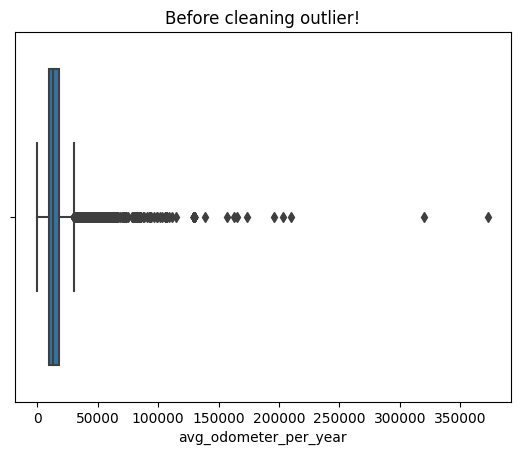

lower_check values : -2298.8321678321718
upper_check values : 28448.268997669005


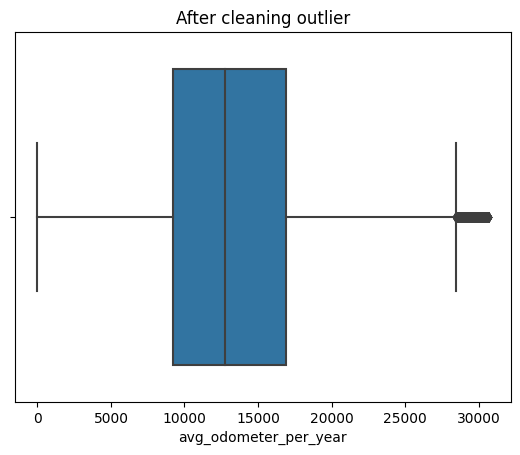


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2298.8321678321718
upper values : 28448.268997669005


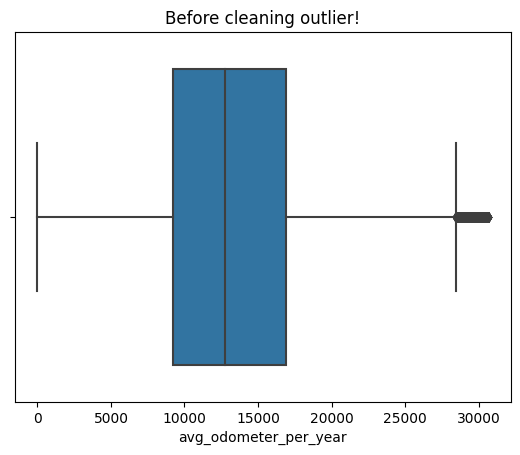

lower_check values : -2084.213235294119
upper_check values : 27959.61683006536


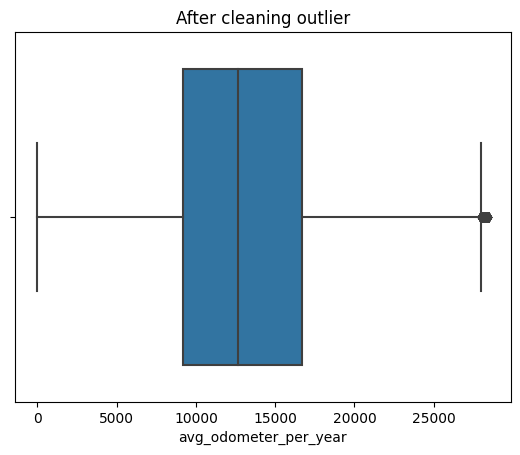


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2084.213235294119
upper values : 27959.61683006536


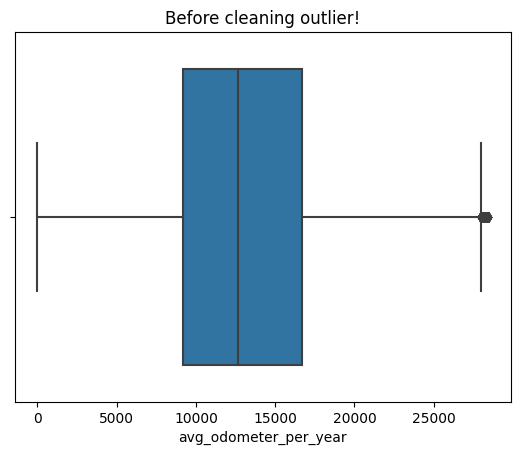

lower_check values : -2046.2301587301554
upper_check values : 27856.30952380952


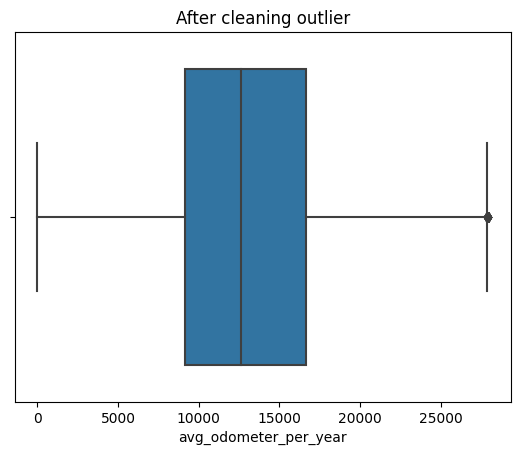


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2046.2301587301554
upper values : 27856.30952380952


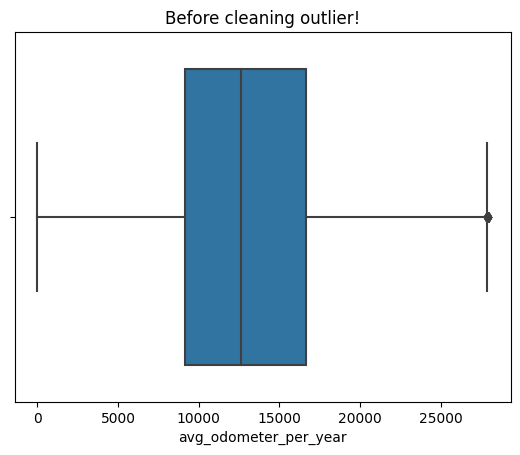

lower_check values : -2037.8787878787898
upper_check values : 27840.909090909092


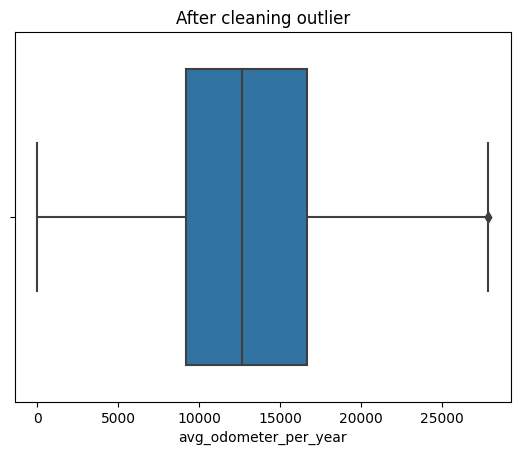


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2037.8787878787898
upper values : 27840.909090909092


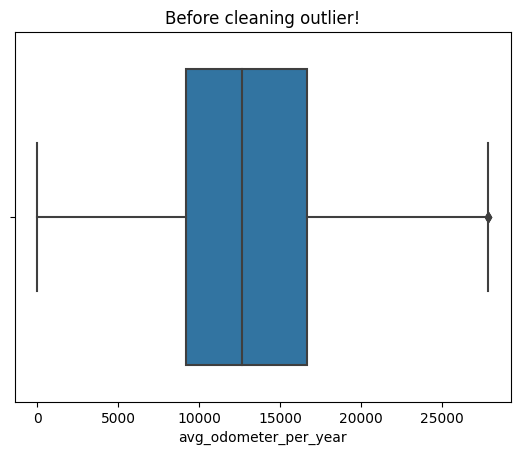

lower_check values : -2037.344696969698
upper_check values : 27840.01893939394


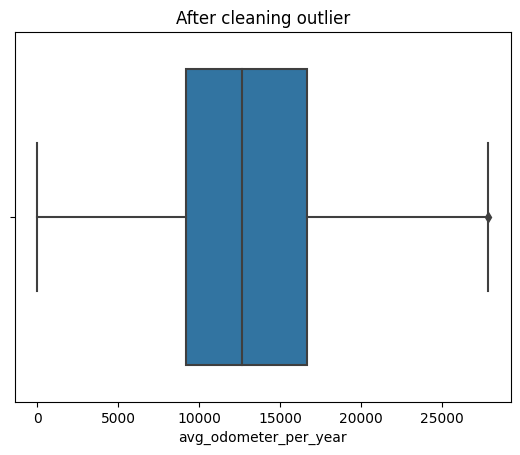


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2037.344696969698
upper values : 27840.01893939394


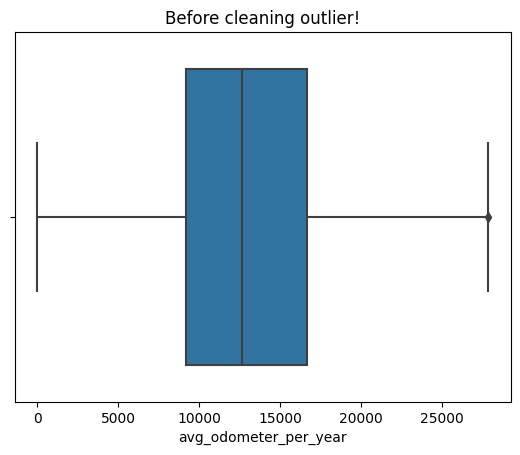

lower_check values : -2036.3928571428605
upper_check values : 27838.432539682544


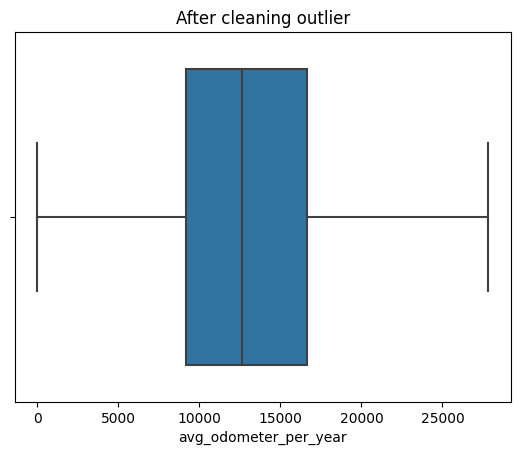


------ [RE-START] cleaning outlier in avg_odometer_per_year column ------ 

lower values : -2036.3928571428605
upper values : 27838.432539682544


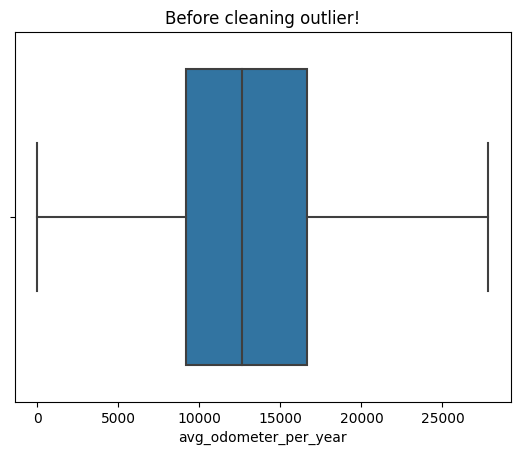

lower_check values : -2036.3928571428605
upper_check values : 27838.432539682544


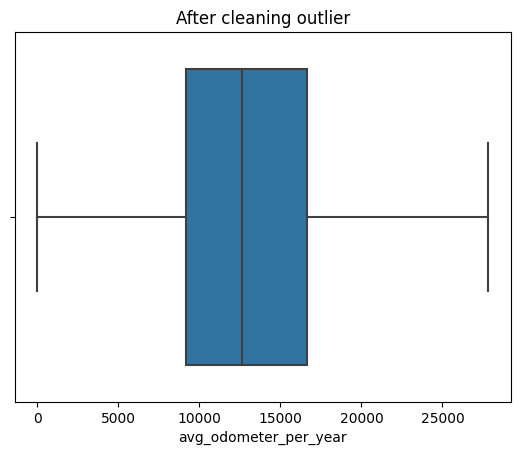


====== [FINISHED] outlier in [avg_odometer_per_year] column has been clear! ====== 


====== [START] cleaning outlier in car_age column ====== 

lower values : -4.5
upper values : 23.5


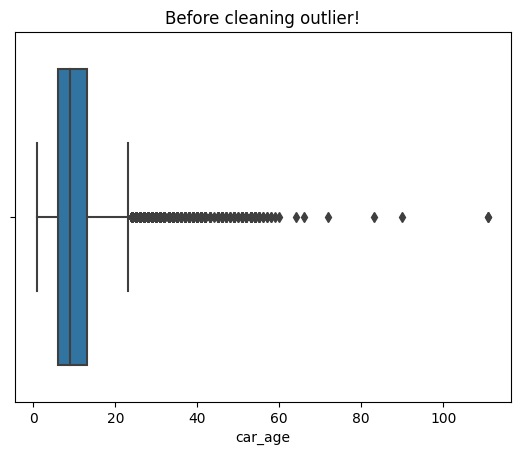

lower_check values : -4.5
upper_check values : 23.5


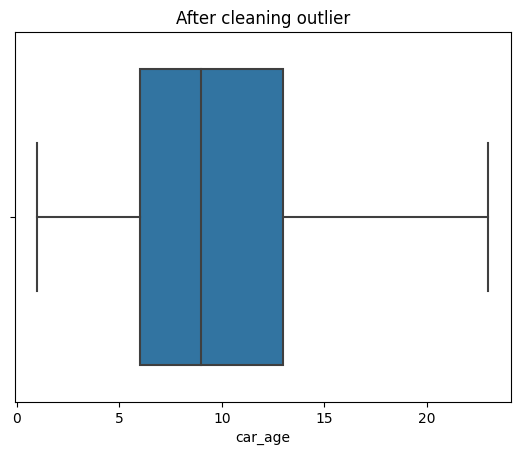


====== [FINISHED] outlier in [car_age] column has been clear! ====== 


====== [START] cleaning outlier in cylinders column ====== 

lower values : -2.0
upper values : 14.0


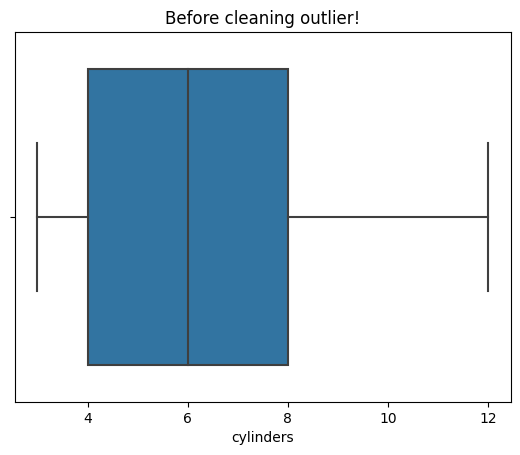

lower_check values : -2.0
upper_check values : 14.0


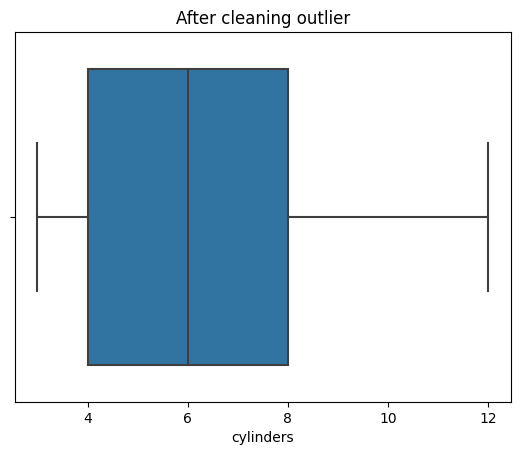


====== [FINISHED] outlier in [cylinders] column has been clear! ====== 



In [59]:
# store filtered columns to separate dataframe

filtered_df = df.copy()
list_of_selected_column = ['condition', 'price', 'avg_odometer_per_year', 'car_age', 'cylinders']

for column in list_of_selected_column:
    print(f'\n====== [START] cleaning outlier in {column} column ====== \n')
    filtered_df = outlier_cleansing(dataframe=filtered_df, column=column)

In [60]:
# distribution in all columns after filtering
filtered_df[list_of_selected_column].describe()

,condition,price,avg_odometer_per_year,car_age,cylinders
count,44336.000000,44336.000000,44336.000000,44336.000000,44336.000000
mean,2.616993,10439.882443,13263.281325,9.769578,6.041591
std,0.683287,7132.091775,5661.742383,4.794771,1.563103
min,1.000000,1.000000,0.000000,1.000000,3.000000
25%,2.000000,4990.000000,9375.000000,6.000000,4.000000
50%,3.000000,8500.000000,12813.161765,9.000000,6.000000
75%,3.000000,14950.000000,16767.750000,13.000000,8.000000
max,4.000000,30000.000000,27834.666667,23.000000,12.000000


The removal of outliers has resulted in a decreased total count of entries to 44,336, meaning that nearly 14% of the overall entries in this dataset have been eliminated. However, the outcome is an improvement in the statistics of the five columns.

The difference between the mean and median across all columns is now minimal, with some values being nearly identical. The standard deviation has also decreased, indicating a reduction in data variability, with data points now more concentrated around the mean.

## Filtered Core Parameters

### Price

<AxesSubplot:xlabel='price'>

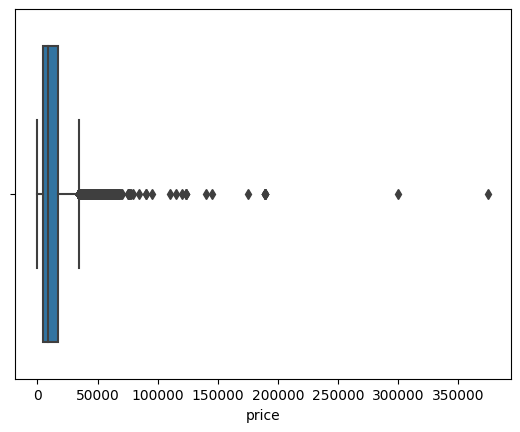

In [61]:
# Boxplot of 'price' on initial DataFrame
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price'>

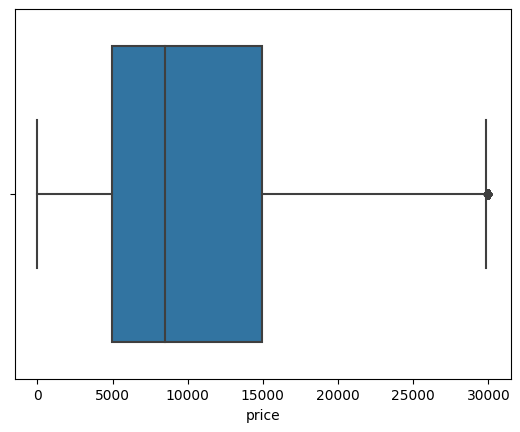

In [62]:
# Boxplot of 'price' on filtered DataFrame
sns.boxplot(filtered_df['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

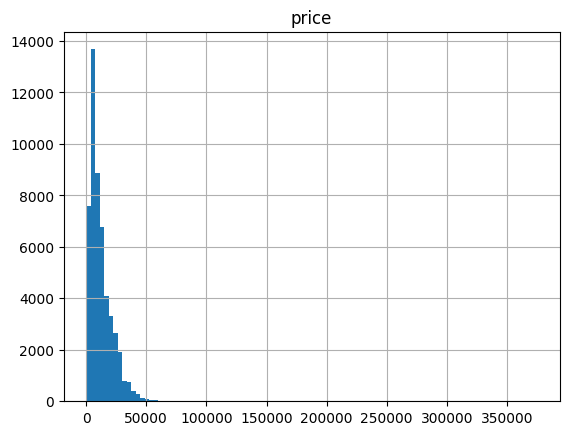

In [63]:
# Histogram of 'price' on initial Dataframe
df.hist('price', bins=100)

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

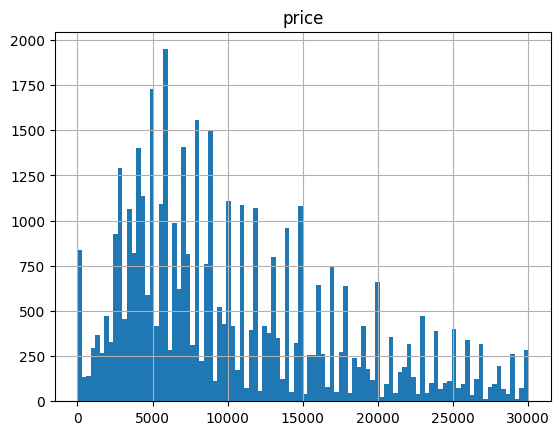

In [64]:
# # Histogram of 'price' on filtered Dataframe
filtered_df.hist('price', bins=100)

The distribution shape of the 'price' data still exhibits characteristics of a light-tailed distribution. However, this distribution is now much more representative of the observed population compared to the distribution prior to outlier removal. The peak of the distribution is closer to the mean value (10,439) than it was previously.

### Vehicle Age

<AxesSubplot:xlabel='car_age'>

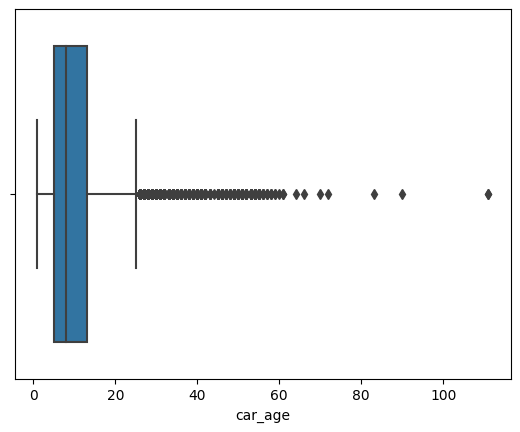

In [65]:
# Boxplot of 'car_age' on initial DataFrame
sns.boxplot(df['car_age'])

<AxesSubplot:xlabel='car_age'>

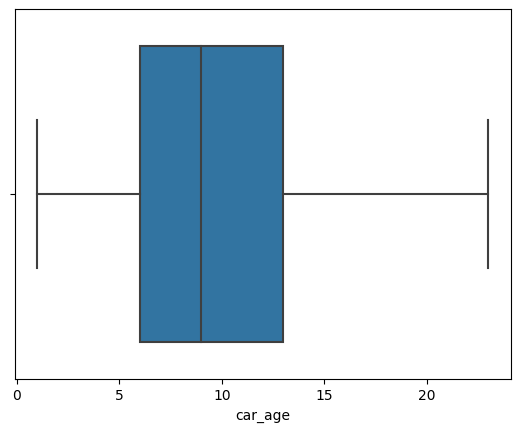

In [66]:
# Boxplot of 'car_age' on filtered DataFrame
sns.boxplot(filtered_df['car_age'])

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

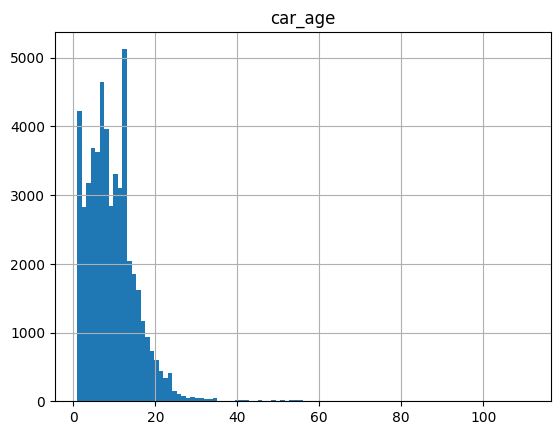

In [67]:
# Histogram of 'car_age' on initial DataFrame
df.hist('car_age', bins=100)

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

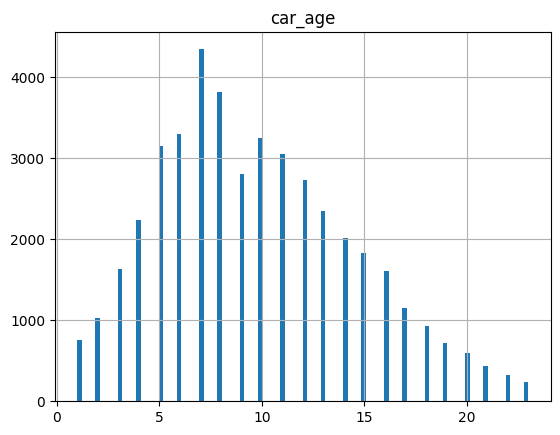

In [68]:
#  Histogram of 'car_age' on filtered DataFrame
filtered_df.hist('car_age', bins=100)

As shown in both boxplots, there were initially many values above the upper whisker. After filtering, the number of values exceeding the upper whisker has significantly decreased. Meanwhile, the histogram reveals a left-skewed distribution with a very high peak (around 7,000). Following the filtering process, although the distribution remains left-skewed, it is now closer to a normal shape, and the peak has lowered to just below 5,000.

### Cylinders

<AxesSubplot:xlabel='cylinders'>

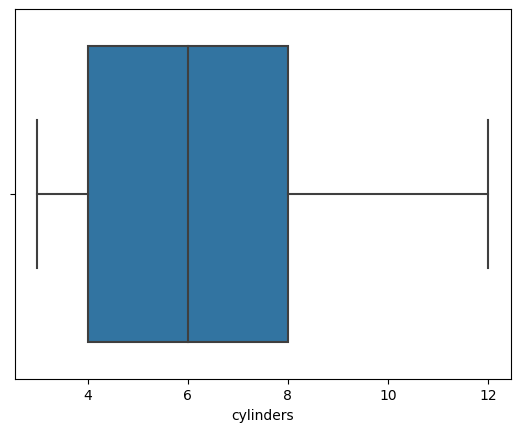

In [69]:
# Boxplot of 'cylinders' on initial DataFrame
sns.boxplot(df['cylinders'])

<AxesSubplot:xlabel='cylinders'>

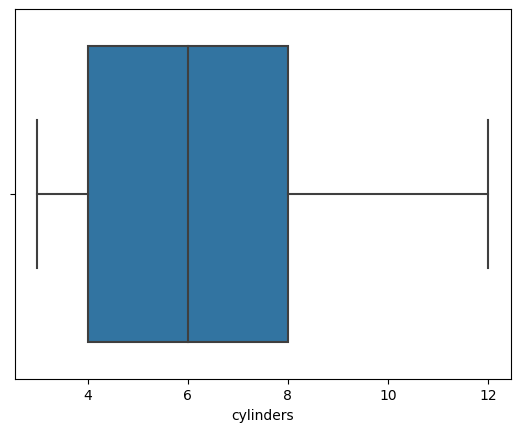

In [70]:
# Boxplot of 'cylinders' on filtered DataFrame
sns.boxplot(filtered_df['cylinders'])

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

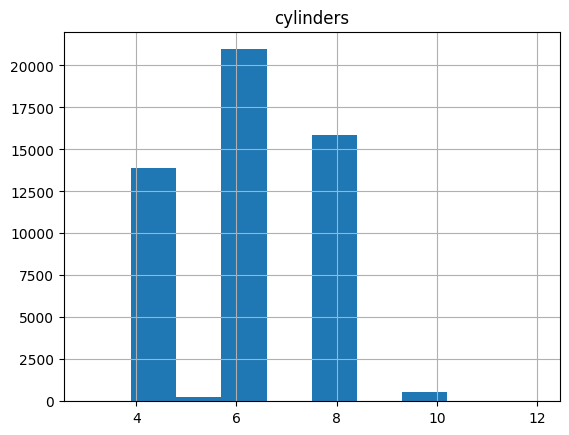

In [71]:
# Histogram of 'cylinders' on initial DataFrame
df.hist('cylinders', bins=10)

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

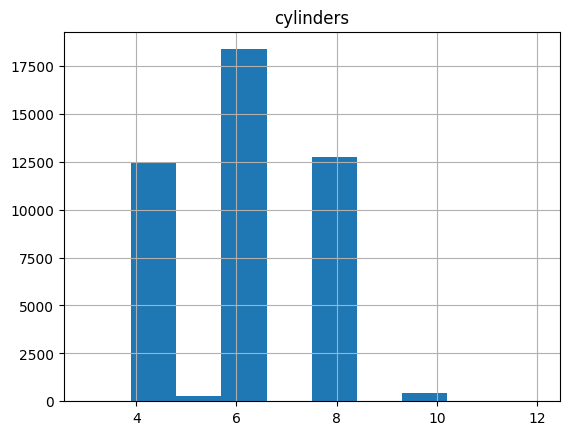

In [72]:
# Histogram of 'cylinders' on filtered DataFrame
filtered_df.hist('cylinders', bins=10)

The distribution shape of the number of cylinders still exhibits characteristics of a light-tailed distribution. However, this distribution is now more representative of the observed population. As shown in the histogram, the peak of the distribution after outlier filtering now falls within the same range as the mean value (6).

### Average Mileage per Year

<AxesSubplot:xlabel='avg_odometer_per_year'>

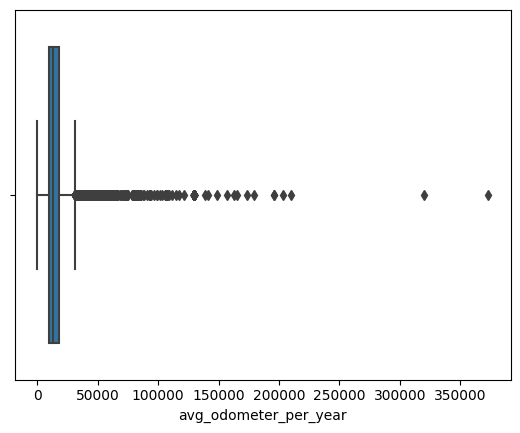

In [73]:
# Boxplot 'avg_odometer_per_year' on initial DataFrame
sns.boxplot(df['avg_odometer_per_year'])

<AxesSubplot:xlabel='avg_odometer_per_year'>

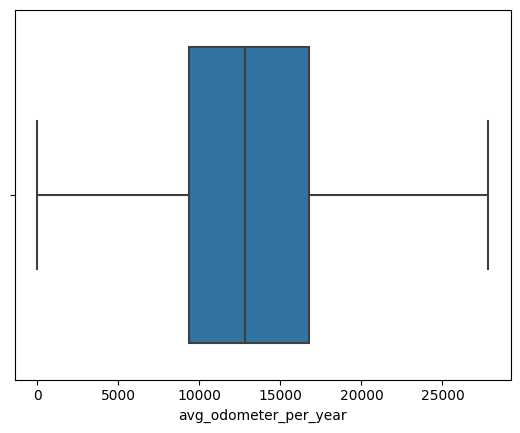

In [74]:
# Boxplot 'avg_odometer_per_year' on filtered DataFrame
sns.boxplot(filtered_df['avg_odometer_per_year'])

array([[<AxesSubplot:title={'center':'avg_odometer_per_year'}>]],
      dtype=object)

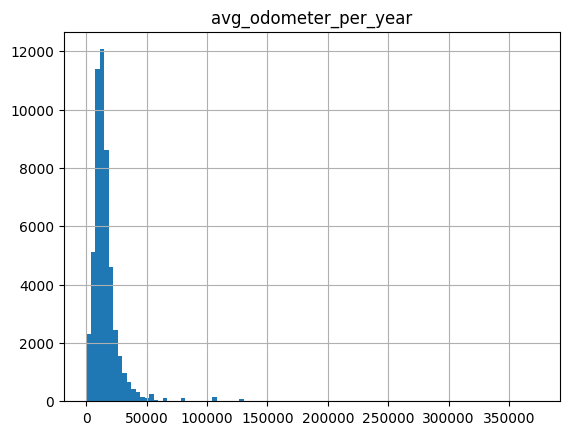

In [75]:
# Histogram 'avg_odometer_per_year' on initial DataFrame
df.hist('avg_odometer_per_year', bins=100)

array([[<AxesSubplot:title={'center':'avg_odometer_per_year'}>]],
      dtype=object)

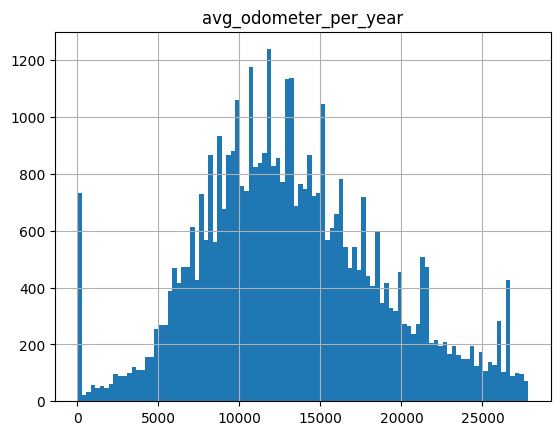

In [76]:
# Histogram 'avg_odometer_per_year' on filtered DataFrame
filtered_df.hist('avg_odometer_per_year', bins=100)

The removal of outliers results in the distribution shifting from being significantly left-skewed to one that approximates a normal distribution. This adjustment enhances the reliability of the analysis as a foundation for decision-making, as it provides a more representative reflection of the observed population.

### Condition

<AxesSubplot:xlabel='condition'>

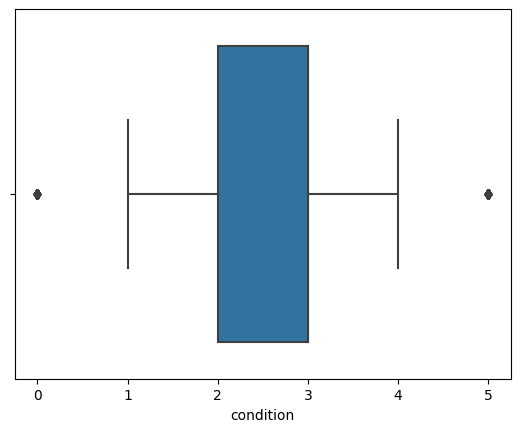

In [77]:
# Boxplot of 'condition' on initial DataFrame
sns.boxplot(df['condition'])

<AxesSubplot:xlabel='condition'>

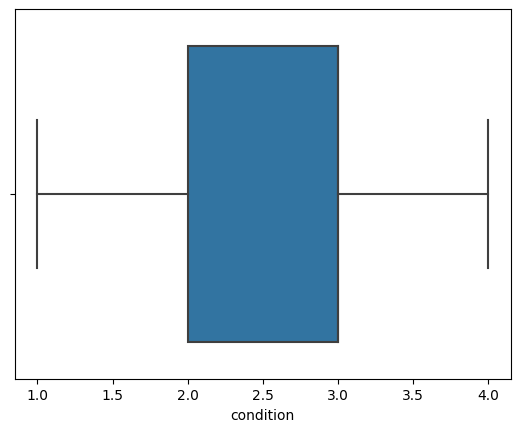

In [78]:
# Boxplot of 'condition' on filtered DataFrame
sns.boxplot(filtered_df['condition'])

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

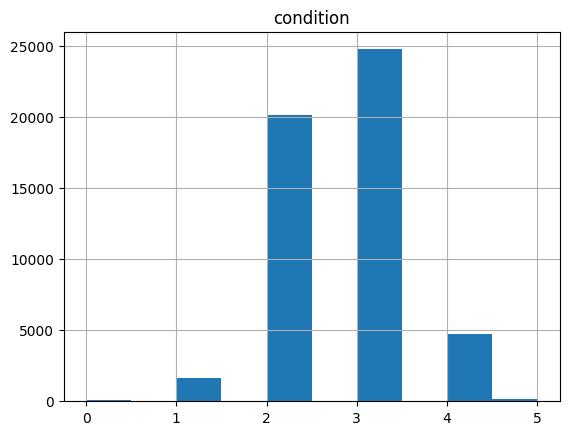

In [79]:
# Histogram of 'condition' on initial DataFrame
df.hist('condition', bins=10)

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

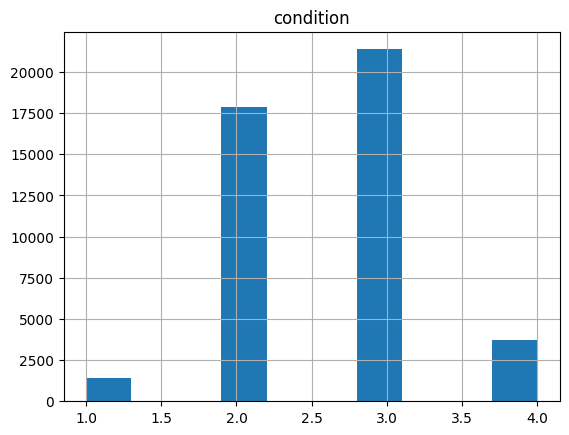

In [80]:
# Histogram of 'condition' on filtered DataFrame
filtered_df.hist('condition', bins=10)

The removal of vehicles classified as salvage (value 0) and new (value 5) initially appeared to have little impact. However, the post-filtering histogram reveals a greater concentration of values around the mean (2.6), indicating that the refined data is more representative of the observed population.

## Advertising Duration

This section aims to provide an overview of ad display duration. The aspects to be included are as follows:

1. the mean and median of ad display duration,
2. ad durations considered too short, and
3. ad durations considered too long.

In [81]:
# first 5 row of filtered DataFrame
filtered_df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,23,6,2018,8,18125.000000
1,25500.0,2009,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10,8870.500000
2,5500.0,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
3,1500.0,2003,ford f-150,1,8,gas,183062.233577,automatic,pickup,other,False,2019-03-22,9,22,3,2019,17,10768.366681
4,14900.0,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667


In [82]:
# describe column 'days_listed'
filtered_df['days_listed'].describe()

count    44336.000000
mean        39.544479
std         28.180705
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Based on the above description, the difference between the mean (39) and median (33) is relatively small. While the standard deviation (28.24) is neither particularly small nor large, the interquartile range (34) substantially covers the first half of the data. This distribution exhibits characteristics of a normal distribution. However, due to the presence of a maximum value that significantly deviates from the mean and median, the distribution will be visualized to examine the spread of the higher values.

<AxesSubplot:xlabel='days_listed'>

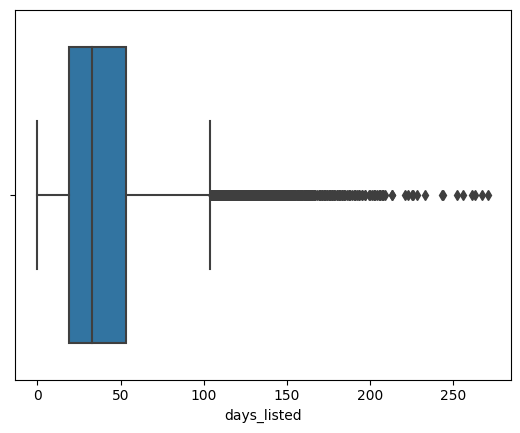

In [83]:
# Boxplot of 'days_listed'
sns.boxplot(filtered_df['days_listed'])

The boxplot above illustrates a substantial number of values exceeding the upper whisker, indicating a non-normal (skewed) distribution shape.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

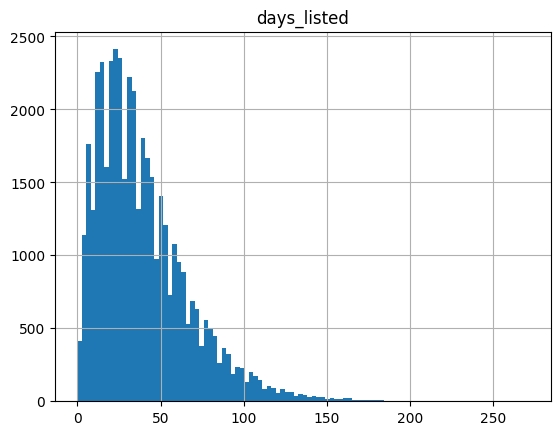

In [84]:
# histogram of 'days_listed'
filtered_df.hist('days_listed', bins=100)

The histogram above confirms the presence of a left-skewed distribution. The existence of high-value data points with low frequencies, if left unaddressed, may render this distribution less ideal for subsequent analytical stages.

To address this issue, the upper and lower boundaries of typical values will be established using the interquartile range.

In [85]:
# identify iqr of 'days_listed'
Q1_days_listed = filtered_df['days_listed'].quantile(0.25)
Q3_days_listed = filtered_df['days_listed'].quantile(0.75)
IQR_days_listed = Q3_days_listed - Q1_days_listed
IQR_days_listed

34.0

In [86]:
#identify durations considered TOO SHORT (below lower whisker of 'days_listed')
lower_whisker_days_listed = Q1_days_listed - (1.5 * IQR_days_listed)
lower_whisker_days_listed

-32.0

Due to the negative values, a manipulation will be applied to set the lower boundary for outlier detection in the `days_listed` variable to 1.

In [87]:
if lower_whisker_days_listed < 1:
    lower_whisker_days_listed = 1
lower_whisker_days_listed

1

In [88]:
#identify durations considered TOO LONG (greater than the whisker of 'days_listed')
upper_whisker_days_listed = Q3_days_listed + (1.5 * IQR_days_listed)
upper_whisker_days_listed

104.0

An ad is considered **too long** if advertised for **104 days or longer**.

In [89]:
# store filtered ad duration in separate DataFrame
filtered_df_2 = filtered_df[(filtered_df['days_listed']>lower_whisker_days_listed) & (filtered_df['days_listed']<upper_whisker_days_listed)].reset_index(drop=True)
filtered_df_2['days_listed'].describe()

count    42672.000000
mean        36.709997
std         22.937923
min          2.000000
25%         19.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

The description of the filtered data indicates that the maximum value has now changed to **103**. Additionally, there have been changes in the mean (now 36.7) and median (now 32). The standard deviation has decreased to 22.94, suggesting that the distribution is becoming increasingly normal.

The following is a visualization of the ad duration data after filtering:

<AxesSubplot:xlabel='days_listed'>

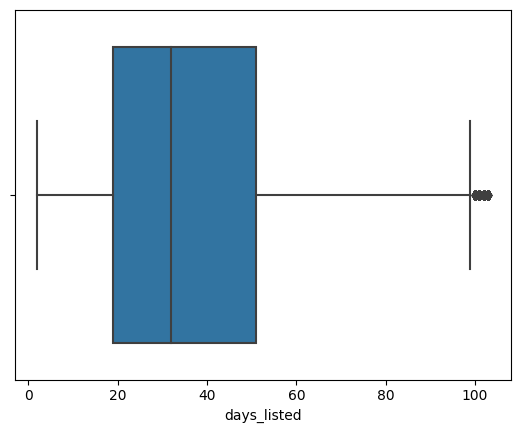

In [90]:
# Boxplot of 'days_listed' from filtered DataFrame
sns.boxplot(filtered_df_2['days_listed'])

While there remain values that exceed the upper whisker, their quantity has been substantially reduced compared to the pre-filtering stage.

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

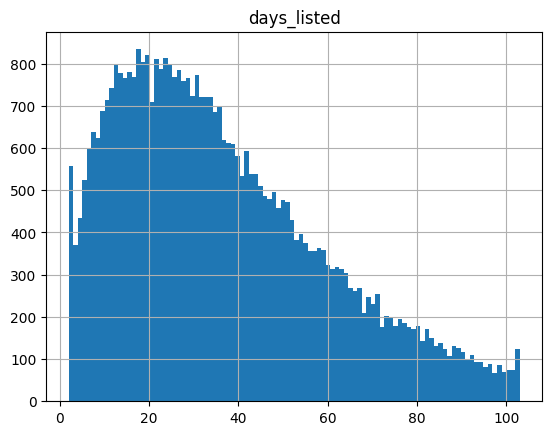

In [91]:
filtered_df_2.hist('days_listed', bins=100)

The distribution shape remains skewed; however, the data is no longer overly concentrated on the left side. This indicates that while the distribution is still not fully normal, the data quality has improved, making it more suitable for the next stage of analysis.

## Average Selling Price by Type

This section conducts an analysis of the number of advertisements and the average price for each type of vehicle. The final output of this section is a graph illustrating the presence or absence of a dependence between the number of advertisements and vehicle type, based on the two vehicle types with the highest advertisement counts.

In [92]:
# compile table of average price and ad number by vehicle type ('type')
agg_group_1 = filtered_df_2.groupby(['type']).agg({
    'price' : 'mean',
    'type' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'type' : 'ads_count'
}).sort_values(by='ads_count', ascending=False)

agg_group_1

,avg_price,ads_count
type,,
sedan,6685.240004,10704
SUV,9841.402460,10652
truck,13935.405111,9548
pickup,13653.931066,5440
coupe,13101.678591,1817
wagon,8731.020144,1390
mini-van,7501.229862,1018
hatchback,6603.519210,911
van,7822.578529,503


Based on the table above, the vehicle types with the highest advertisement counts are **sedans** and **SUVs**. 

The following visualization presents a bar chart that provides a clearer comparison of the **average prices** (represented by blue bars) and the **number of advertisements** (represented by orange bars) based on vehicle type.

Text(0, 0.5, 'Average price per type')

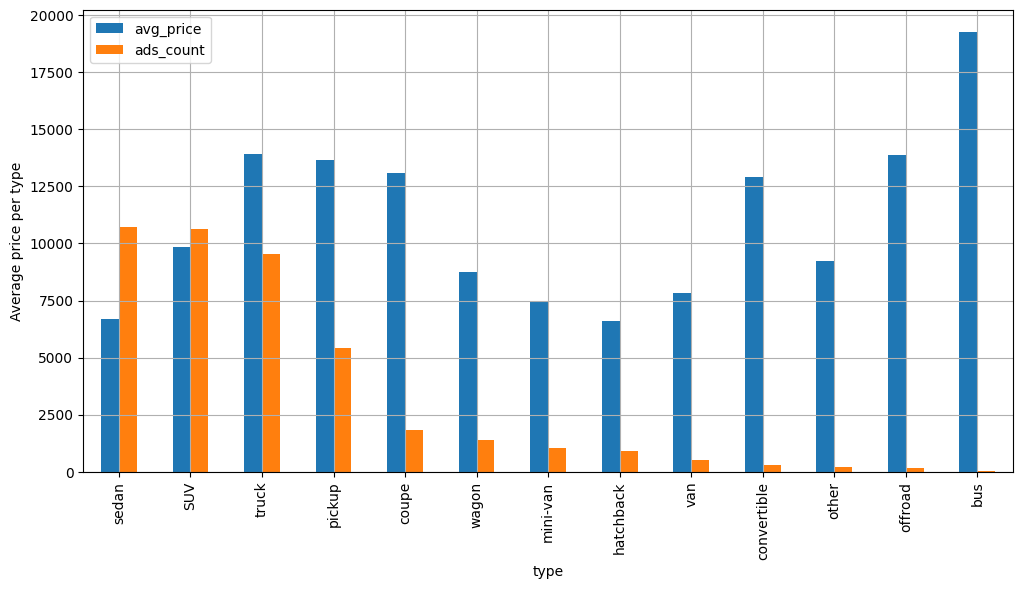

In [93]:
agg_group_1.plot(kind='bar', grid=True, figsize=(12, 6));
plt.ylabel('Average price per type')

## Price-influencing Factors

This section examines the correlation between price and other factors for the two most frequently advertised vehicle types: **sedans** and **SUVs**.    
The factors to be analyzed for their correlation with price include:

- Mileage,  
- Vehicle age,  
- Condition of the vehicle at the time of advertisement,  
- Transmission type, and  
- Vehicle color.  

Each correlation will be visualized using either scatterplots or boxplots.

### Sedan

In [94]:
# overview of sedan type cars
df_sedan = filtered_df_2[filtered_df_2['type']=='sedan'].reset_index(drop=True)
df_sedan.shape

(10704, 18)

In [95]:
df_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
0,5500.0,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,7,15714.285714
1,14900.0,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,3,26967.666667
2,14990.0,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,20,6,2018,5,11590.800000
3,12990.0,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,27,12,2018,4,19803.000000
4,8990.0,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,28,3,2019,8,13892.750000


In [96]:
# display correlation between price and other parameters for sedan cars
df_sedan.corr()['price'].sort_values()

car_age                 -0.626419
odometer                -0.545592
cylinders               -0.039144
month_posted            -0.038634
days_listed             -0.001294
day_posted               0.006852
year_posted              0.033676
is_4wd                   0.057839
avg_odometer_per_year    0.099760
condition                0.303067
model_year               0.630125
price                    1.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Correlation between PRICE and ODOMETER')

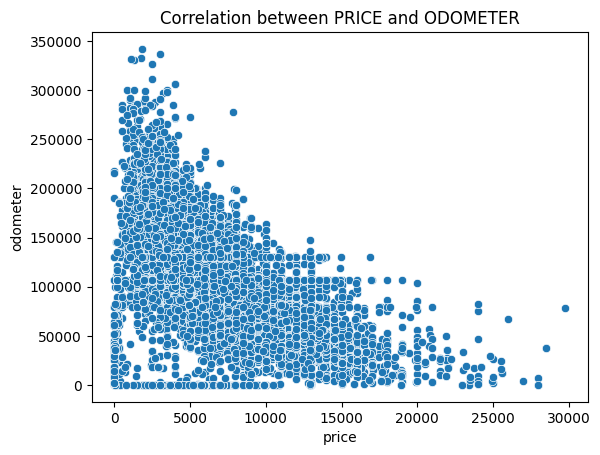

In [97]:
#display correlation between price and mileage
sns.scatterplot(data=df_sedan, x='price', y='odometer')
plt.title('Correlation between PRICE and ODOMETER')

A correlation of -0.54 exists between price and mileage for sedans. This indicates a moderate negative linear relationship between price and mileage, whereby **an increase in the mileage of a sedan is associated with a decrease in its selling price.**

Text(0.5, 1.0, 'Correlation between PRICE and VEHICLE AGE')

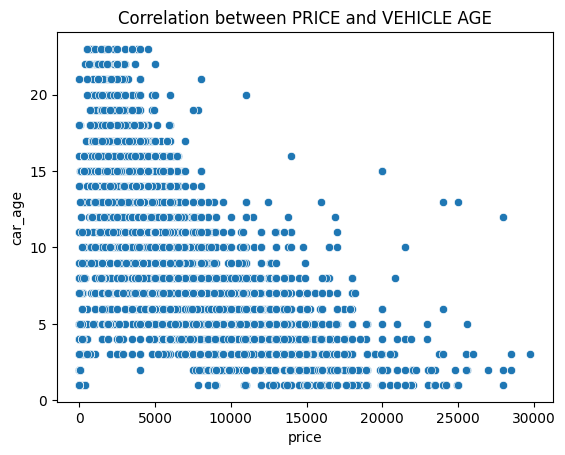

In [98]:
# check the correlation between price and vehicle age on sedan cars
sns.scatterplot(data=df_sedan, x='price', y='car_age')
plt.title('Correlation between PRICE and VEHICLE AGE')

A correlation of -0.62 exists between price and vehicle age for sedans. This indicates a moderate negative linear relationship between price and vehicle age, whereby **an increase in the age of a sedan is associated with a decrease in its selling price.**

Text(0.5, 1.0, 'Correlation between PRICE and VEHICLE AGE')

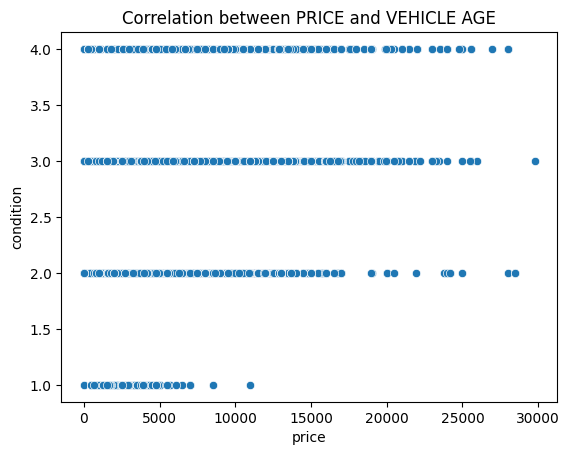

In [99]:
# check the correlation between price and condition on sedan cars
sns.scatterplot(data=df_sedan, x='price', y='condition')
plt.title('Correlation between PRICE and VEHICLE AGE')

With a Pearson correlation coefficient of 0.3, there is a very weak positive linear relationship between price and vehicle condition. This indicates that as the condition of the vehicle improves, its price tends to increase. However, it is important to note that the strength of this correlation is quite weak, making it insufficient to be considered a decisive factor in pricing.

In [100]:
# number of sedan cars by transmision type
df_sedan['transmission'].value_counts()

automatic    10063
manual         528
other          113
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Correlation between PRICE and TRANSMISSION TYPE')

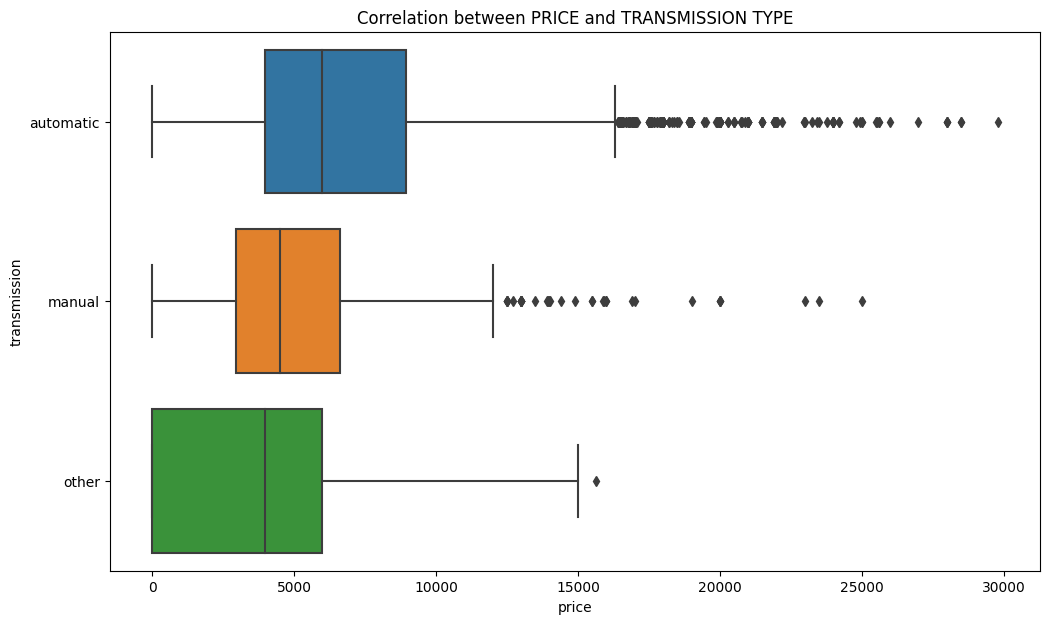

In [101]:
# check the correlation between price and transmision type on sedan cars
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_sedan, x='price', y='transmission')
plt.title('Correlation between PRICE and TRANSMISSION TYPE')

At a glance, vehicles with automatic transmission appear to have a higher maximum selling price, followed by vehicles with other types of transmission, and finally manual transmission vehicles. 

Given that transmission type is a variable with nominal categorical values, Pearson correlation coefficients cannot be calculated. Instead, a one-way ANOVA test will be conducted to determine whether there are significant price differences among the three transmission types.

In [102]:
# extract unique values from column ‘transmission
transmission_types = df_sedan['transmission'].unique()

# new dataframe for each transmision type
transmission_groups = [df_sedan[df_sedan['transmission'] == t]['price'] for t in transmission_types]

# execute ANOVA one-way testing
f_statistic_transmission, p_value_transmission = f_oneway(*transmission_groups)

# display F-Statistic and P-Value
f_statistic_transmission, p_value_transmission

(57.49939968557421, 1.45062112410863e-25)

In [103]:
# check signicifance of p-value  (p < 0.05)
if p_value_transmission < 0.05:
    print("There ARE significant price differences among each transmission type.")
else:
    print("There are NO significant price differences among each transmission type.")


There ARE significant price differences among each transmission type.


The results of this test indicate that, **on average, sedans with automatic transmission tend to be more expensive than sedans with manual transmission.**

In [104]:
# check the correlation between price and paint color on sedan cars
df_sedan['paint_color'].value_counts()

other     1940
silver    1800
black     1531
grey      1441
white     1308
blue      1098
red        852
custom     256
brown      238
green      187
purple      24
yellow      20
orange       9
Name: paint_color, dtype: int64

In [105]:
#compile list elimination paint color with ad counts <50
list_color = list(df_sedan['paint_color'].value_counts()[:-3].index)
list_color

['other',
 'silver',
 'black',
 'grey',
 'white',
 'blue',
 'red',
 'custom',
 'brown',
 'green']

In [106]:
df_sedan_colors = df_sedan[df_sedan['paint_color'].isin(list_color)].reset_index(drop=True)

Text(0.5, 1.0, 'Correlation between PRICE and PAINT COLOR')

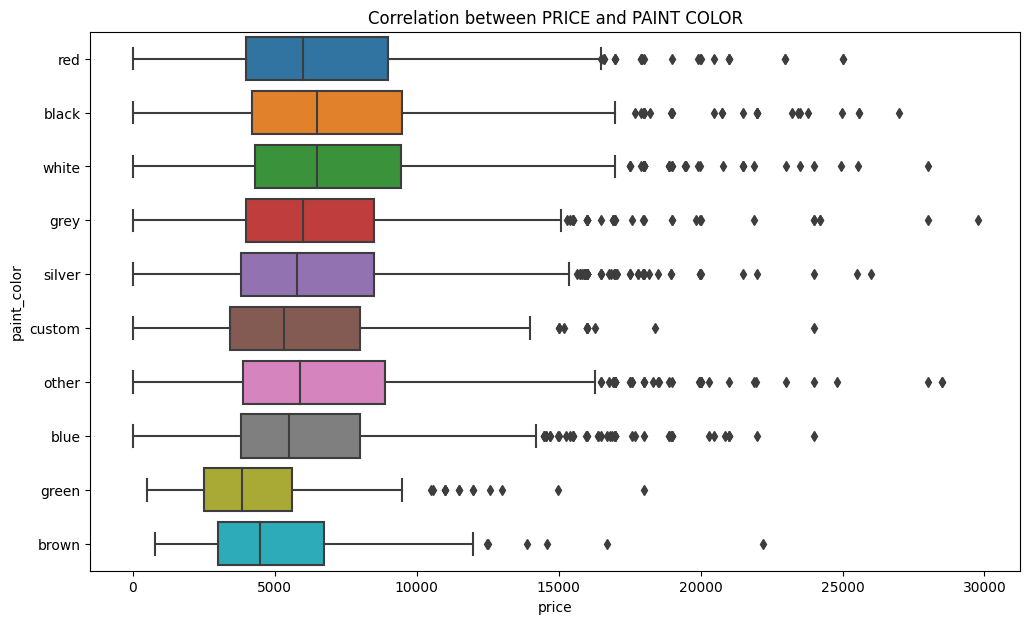

In [107]:
plt.figure(figsize=(12, 7));
sns.boxplot(data=df_sedan_colors, x='price', y='paint_color')
plt.title('Correlation between PRICE and PAINT COLOR' )

At first glance, the prices for each color do not appear to differ significantly. However, further testing is necessary to confirm whether the observed price differences are indeed insignificant, as illustrated in the boxplot comparison above.

Since color is a variable with nominal categorical values, Pearson correlation coefficients cannot be calculated. Instead, similar to the analysis conducted for transmission types, a one-way ANOVA test will be performed to assess the significance of price differences among the various colors.

In [108]:
# extract unique values from column ‘paint_color'
color_types = df_sedan['paint_color'].unique()

# new dataframe for each paint color
color_groups = [df_sedan[df_sedan['paint_color'] == t]['price'] for t in color_types]

# execute ANOVA one-way testing
f_statistic_color, p_value_color = f_oneway(*color_groups)

# display F-Statistic and P-Value
f_statistic_color, p_value_color

(15.413925631963298, 8.267361238643854e-33)

In [109]:
# check the significance of p-value  (p < 0.05)
if p_value_color < 0.05:
    print("There ARE significant price differences among each color.")
else:
    print("There are NO significant price differences among each color.")


There ARE significant price differences among each color.


The results of this test indicate that, **on average, sedans in black and in white tend to be more expensive than sedans of other colors.**

### SUV

In [110]:
# overview of sedan type cars
df_suv = filtered_df_2[filtered_df_2['type']=='SUV'].reset_index(drop=True)
df_suv.shape

(10652, 18)

In [111]:
# first 5 rows of df_suv
df_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_odometer_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,23,6,2018,8,18125.000000
1,15990.0,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,7,1,2019,7,15639.000000
2,11500.0,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,other,True,2018-07-16,19,16,7,2018,7,14882.000000
3,9200.0,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,15,2,2019,12,12265.916667
4,12990.0,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,31,1,2019,11,12025.909091


In [112]:
# correlation of price and other parameters for SUV type vehicles
df_suv.corr()['price'].sort_values()

car_age                 -0.575361
odometer                -0.486043
cylinders               -0.028054
month_posted            -0.015696
days_listed             -0.012265
day_posted               0.005986
year_posted              0.011065
is_4wd                   0.120230
avg_odometer_per_year    0.169120
condition                0.271582
model_year               0.577380
price                    1.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Correlation between PRICE and ODOMETER')

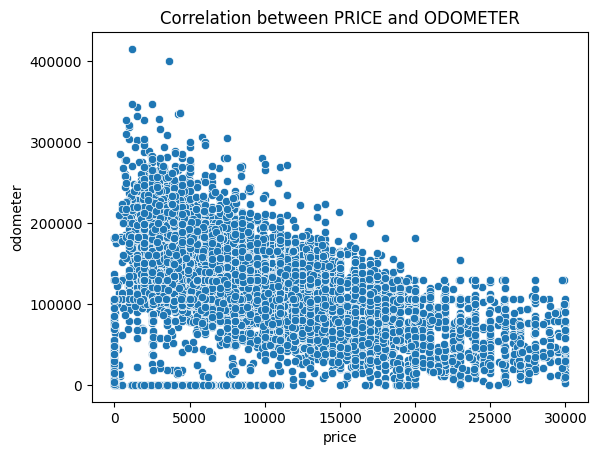

In [113]:
#correlation of price and mileage on SUV type
sns.scatterplot(data=df_suv, x='price', y='odometer')
plt.title('Correlation between PRICE and ODOMETER')

A correlation of -0.48 exists between price and mileage for SUVs. This indicates a moderate negative linear relationship between price and mileage, whereby **an increase in the mileage of an SUV is associated with a decrease in its selling price.**

Text(0.5, 1.0, 'Correlation between PRICE and VEHICLE AGE')

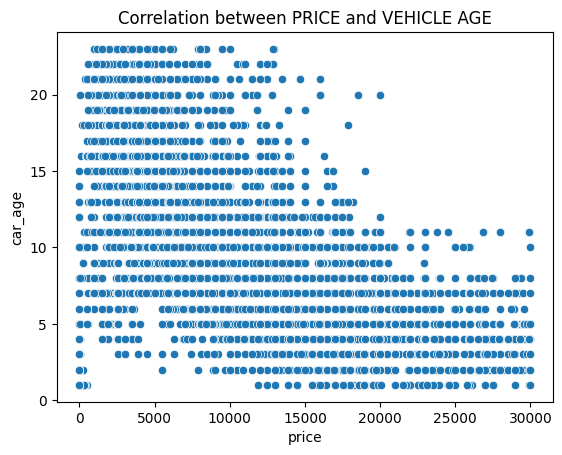

In [114]:
#correlation between price and vehicle age on SUV
sns.scatterplot(data=df_suv, x='price', y='car_age')
plt.title('Correlation between PRICE and VEHICLE AGE')

A correlation of -0.57 exists between price and vehicle age for SUVs. This indicates a moderate negative linear relationship between price and vehicle age, whereby an increase in the age of an SUV is associated with a decrease in its selling price.

In [115]:
# count of SUV vehicle by transmission tuype
df_suv['transmission'].value_counts()

automatic    10082
manual         428
other          142
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Correlation between PRICE and TRANSMISSION TYPE')

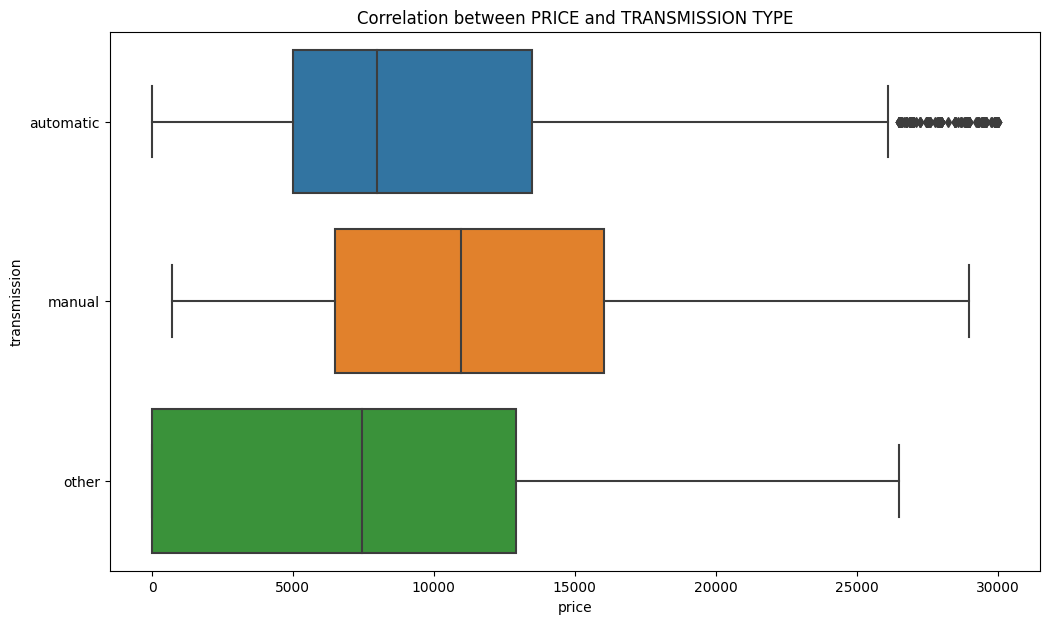

In [116]:
#correlation of price and transmission type on SUV 
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_suv, x='price', y='transmission')
plt.title('Correlation between PRICE and TRANSMISSION TYPE')

At first glance, SUVs with manual transmission appear to have the highest maximum selling price, followed by those with other types of transmission, and finally those with automatic transmission. However, it is important to note that there are also a considerable number of SUVs with extreme high selling prices across various transmission types.

Given that transmission type is a variable with nominal categorical values, Pearson correlation coefficients cannot be calculated. Instead, a one-way ANOVA test will be conducted to determine whether there are significant price differences among the three transmission types.

In [117]:
#extract unique values from column 'transmission'
suv_transmission_types = df_suv['transmission'].unique()

# separate dataframe for each transmission type
suv_transmission_groups = [df_suv[df_suv['transmission'] == t]['price'] for t in transmission_types]

# ANOVA one-way
f_statistic_transmission_suv, p_value_transmission_suv = f_oneway(*suv_transmission_groups)

# display F-Statistic and P-Value
f_statistic_transmission_suv, p_value_transmission_suv

(23.44293515203872, 6.93761229023424e-11)

In [118]:
# check the significance of p-value  (p < 0.05)
if p_value_transmission_suv < 0.05:
    print("There ARE significant price differences among each transmission type.")
else:
    print("There are NO significant price differences among each transmission type..")

There ARE significant price differences among each transmission type.


The results of this test indicate that, **on average, SUVs with manual transmission tend to be more expensive than those with automatic transmission.**

In [119]:
# correlation between price and paint color on SUV vehicles
df_suv['paint_color'].value_counts()

other     1902
black     1870
white     1617
silver    1380
grey      1019
blue       912
red        813
green      391
brown      329
custom     270
orange      72
purple      39
yellow      38
Name: paint_color, dtype: int64

In [120]:
# list eliminating paint colors with ad counts <50
list_color_suv = list(df_suv['paint_color'].value_counts()[:-3].index)
list_color_suv

['other',
 'black',
 'white',
 'silver',
 'grey',
 'blue',
 'red',
 'green',
 'brown',
 'custom']

In [121]:
# store filtered data to separate dataframe
df_suv_colors = df_suv[df_suv['paint_color'].isin(list_color_suv)].reset_index(drop=True)

Text(0.5, 1.0, 'Correlation between PRICE and PAINT COLOR')

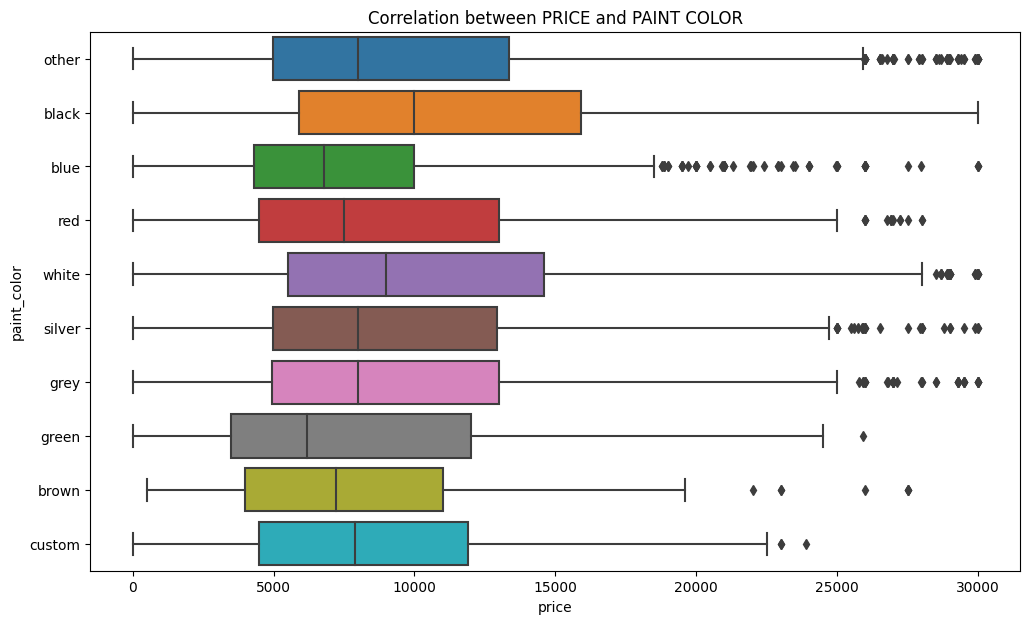

In [122]:
plt.figure(figsize=(12, 7));
sns.boxplot(data=df_suv_colors, x='price', y='paint_color')
plt.title('Correlation between PRICE and PAINT COLOR' )

Secara sekilas terlihat harga untuk tiap warna cukup berbeda. Namun hal ini perlu diuji lebih lanjut untuk memastikan apakah perbedaan harganya signifikan, seperti yang terlihat dalam perbandingan boxplot di atas.

Karena warna adalah variabel dengan nilai kategorik nominal, maka koefisien korelasi Pearson tidak dapat dilakukan. Sebagai gantinya, dilakukan uji ANOVA one-way untuk melihat signifikansi perbedaan harga pada tiap jenis warna.

In [123]:
# extract uniqe values from column ‘paint_color'
color_types_suv = df_suv['paint_color'].unique()

# separate dataframe for each paint color
color_groups_suv = [df_suv[df_suv['paint_color'] == t]['price'] for t in color_types]

# ANOVA one-way
f_statistic_color_suv, p_value_color_suv = f_oneway(*color_groups_suv)

# display F-Statistic and P-Value
f_statistic_color_suv, p_value_color_suv

(29.39669293665994, 5.463758166974443e-67)

In [124]:
# check significance of p-value  (p < 0.05)
if p_value_color_suv < 0.05:
    print("There ARE significant price differences among each paint color.")
else:
    print("There are no significant price differences among each paint color.")

There ARE significant price differences among each paint color.


The results of this test indicate that, **on average, SUVs in black are more expensive than those in other colors.**

[Back to Contents](#contents)

# Findings and Conclusion

The analysis of factors influencing selling prices was conducted using advertisement viewing data collected over recent years. This dataset contains information on price, model year, make, condition, number of cylinders, fuel type, mileage, transmission type, color, drivetrain, advertisement display date, and the number of days the advertisement was displayed. The original dataframe consists of 51,525 rows and 11 columns.

During the data preprocessing stage, missing values were identified in the columns for model year, number of cylinders, mileage, drivetrain, and vehicle color. Additionally, inconsistencies in data types were found, specifically in the columns for model year, drivetrain, price, number of cylinders, and advertisement display date.

In the data transformation phase, missing values were handled as follows:
- For the drivetrain column, missing values were replaced with "0" to indicate that the vehicle in that row is not a four-wheel drive.
- For the vehicle color column, missing values were replaced with "other."
- For the mileage column, missing values were substituted with the **mean** of the entire dataset. 
- For the number of cylinders column, missing values were replaced with the **median** of the dataset.
- For the model year column, missing values were also replaced with the **median** of the dataset.

Data type transformations were also performed: the model year column was converted to integer type, the number of cylinders column was changed to integer, the price column was converted to float, the drivetrain column was transformed into Boolean type, and the advertisement display date column was changed to datetime type.

In the data quality improvement stage, **several new columns were added** to store data extracted from existing columns or derived from the processing of several existing columns. This addition aimed to facilitate exploratory data analysis. The newly added columns include:

- Date the advertisement was posted (`date_posted`)
- Month the advertisement was posted (`month_posted`)
- Year the advertisement was posted (`year_posted`)
- Vehicle age at the time of advertisement (`car_age`)
- Average mileage per year (`avg_odometer_per_year`)

Additionally, the `condition` column was modified, transitioning from string representations of condition categories to integer values on a scale from 0 to 5, where 0 represents 'salvage' and 5 signifies 'new.'

In the exploratory data analysis phase, outlier values were eliminated for five core parameters: price, vehicle age, average mileage, number of cylinders, and condition category. This manipulation was based on **theoretical upper and lower bounds**, calculated using the interquartile range.

After cleaning the data of outliers, a reassessment of the five core parameters was conducted. Subsequently, correlation and one-way ANOVA test were performed between price and other parameters for the two most frequently advertised vehicle types: sedans and SUVs.

<span style="font-size:16pt; font-weight: bold;">Findings</span>

The **age** of the vehicle and **mileage** are two factors that have the **strongest relationship with selling price.**

There is a negative correlation between selling price and vehicle age, indicating that as the age of a car increases, its selling price decreases. This holds true for both sedan and SUV types, with correlation coefficient values that are not significantly different (-0.62 for sedans and -0.57 for SUVs).

Similarly, mileage also shows a negative correlation with selling price, where higher mileage results in lower selling prices. This pattern is consistent for both sedan and SUV types, with correlation coefficients that are relatively close (-0.48 for sedans and -0.54 for SUVs).

**The condition of a vehicle** is often assumed to have a strong relationship with selling price (the better the condition, the higher the selling price). In this analysis, although there is a positive correlation between condition and price, **the strength of this correlation is relatively low** (0.3 for sedans and 0.27 for SUVs). This requires further investigation, particularly considering other factors that may indirectly influence the relationship, such as the income levels of the population, interest rates for bank loans, and more.

Another finding is the **significant price differences among the three types of transmissions**. This holds true for both sedan and SUV types, although with slightly different patterns.

SUVs with manual transmissions have significantly higher selling prices compared to SUVs with automatic transmissions and other types. In contrast, sedans with automatic transmissions exhibit significantly higher selling prices compared to sedans with manual transmissions and other types. This pattern aligns with common assumptions. Sedans are designed for urban roads, which are relatively flat and often congested, making automatic transmissions more favorable for drivers. Conversely, SUVs are built for more varied terrains and do not frequently encounter traffic jams, leading to a preference for manual transmissions among drivers.

Additionally, **significant price differences were also found based on vehicle color**. This finding is quite notable, as color is the only non-rational factor examined in this analysis. Vehicle age, mileage, condition, and transmission type are factors that directly affect vehicle performance, after-sales expenses, and even driver safety probabilities. However, this is not the case with color, which is almost always chosen based on the emotional preferences of buyers.

<span style="font-size:16pt; font-weight: bold;">Conclusion</span>

In conclusion, the analysis reveals that vehicle age and mileage are the strongest predictors of selling price, with negative correlations observed for both sedan and SUV types. While vehicle condition also shows a positive correlation with price, its strength is relatively low, suggesting the need for further investigation into additional influencing factors. Furthermore, significant price differences exist among transmission types, with manual SUVs commanding higher prices than their automatic counterparts, and automatic sedans being more valuable than manual sedans. Notably, color also impacts selling prices, highlighting its role as a non-rational factor influenced by emotional preferences. This comprehensive examination underscores the multifaceted nature of vehicle pricing, integrating both rational performance metrics and subjective buyer preferences.

[Back to Contents](#contents)